In [210]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report, f1_score

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, adjusted_rand_score

from warnings import filterwarnings
filterwarnings('ignore')

# Data Preperation

In [6]:
data = pd.read_csv('AccidentLondonBoroughs2223.csv')

In [7]:
data.head().T

0              1  \
Accident_Index                               200501BS00001  200501BS00002   
Location_Easting_OSGR                               525680         524170   
Location_Northing_OSGR                              178240         181650   
Longitude                                         -0.19117      -0.211708   
Latitude                                         51.489096      51.520075   
Police_Force                                             1              1   
Accident_Severity                                        2              3   
Number_of_Vehicles                                       1              1   
Number_of_Casualties                                     1              1   
Date                                            04/01/2005     05/01/2005   
Day_of_Week                                              3              4   
Time                                                 17:42          17:36   
Local_Authority_District                                12             12   
Local_Authority_Highway                          E09000020      E09000020   
1st_Road_Class                                           3              4   
1st_Road_Number                                       3218            450   
Road_Type                                                6              3   
Speed_limit                                             30             30   
Junction_Detail                                          0              6   
Junction_Control                                        -1              2   
2nd_Road_Class                                          -1              5   
2nd_Road_Number                                          0              0   
Pedestrian_Crossing-Human_Control                        0              0   
Pedestrian_Crossing-Physical_Facilities                  1              5   
Light_Conditions                                         1              4   
Weather_Conditions                                       2              1   
Road_Surface_Conditions                                  2              1   
Special_Conditions_at_Site                               0              0   
Carriageway_Hazards                                      0              0   
Urban_or_Rural_Area                                      1              1   
Did_Police_Officer_Attend_Scene_of_Accident              1              1   
LSOA_of_Accident_Location                        E01002849      E01002909   

                                                         2              3  \
Accident_Index                               200501BS00003  200501BS00004   
Location_Easting_OSGR                               524520         526900   
Location_Northing_OSGR                              182240         177530   
Longitude                                        -0.206458      -0.173862   
Latitude                                         51.525301      51.482442   
Police_Force                                             1              1   
Accident_Severity                                        3              3   
Number_of_Vehicles                                       2              1   
Number_of_Casualties                                     1              1   
Date                                            06/01/2005     07/01/2005   
Day_of_Week                                              5              6   
Time                                                 00:15          10:35   
Local_Authority_District                                12             12   
Local_Authority_Highway                          E09000020      E09000020   
1st_Road_Class                                           5              3   
1st_Road_Number                                          0           3220   
Road_Type                                                6              6   
Speed_limit                                             30             30   
Junction_Detail                                     

In [10]:
# checking data shape
data.shape

(145222, 32)

In [12]:
# checking information of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145222 entries, 0 to 145221
Data columns (total 32 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   Accident_Index                               145222 non-null  object 
 1   Location_Easting_OSGR                        145222 non-null  int64  
 2   Location_Northing_OSGR                       145222 non-null  int64  
 3   Longitude                                    145222 non-null  float64
 4   Latitude                                     145222 non-null  float64
 5   Police_Force                                 145222 non-null  int64  
 6   Accident_Severity                            145222 non-null  int64  
 7   Number_of_Vehicles                           145222 non-null  int64  
 8   Number_of_Casualties                         145222 non-null  int64  
 9   Date                                         145222 non-nul

#### Seperating specific Borough Data

In [15]:
data['Local_Authority_Highway'].unique()

array(['E09000020', 'E09000033', 'E09000013', 'E09000001', 'E09000030',
       'E09000028', 'E09000012', 'E09000019', 'E09000007', 'E09000022',
       'E09000005', 'E09000014', 'E09000003', 'E09000009', 'E09000027',
       'E09000031', 'E09000025', 'E09000017', 'E09000015', 'E09000018',
       'E09000010', 'E09000026', 'E09000002', 'E09000016', 'E09000008',
       'E09000032', 'E09000029', 'E09000023', 'E09000006', 'E09000011',
       'E09000004', 'E09000021', 'E09000024'], dtype=object)

In [17]:
# Seperating borough data from Unique ID in local authorithy highway column
borough_data = data.loc[data['Local_Authority_Highway'] == 'E09000014']

In [19]:
print('Filtered data of Herringey Borough')
borough_data.head().T

Filtered data of Herringey Borough


2782           2917  \
Accident_Index                               200501EO40153  200501EO40310   
Location_Easting_OSGR                               530760         531030   
Location_Northing_OSGR                              187400         187210   
Longitude                                        -0.114643      -0.110821   
Latitude                                         51.570263      51.568493   
Police_Force                                             1              1   
Accident_Severity                                        2              3   
Number_of_Vehicles                                       1              1   
Number_of_Casualties                                     1              1   
Date                                            01/03/2005     04/04/2005   
Day_of_Week                                              3              2   
Time                                                 17:45          15:30   
Local_Authority_District                                31             31   
Local_Authority_Highway                          E09000014      E09000014   
1st_Road_Class                                           3              5   
1st_Road_Number                                       1201              0   
Road_Type                                                6              6   
Speed_limit                                             30             30   
Junction_Detail                                          0              6   
Junction_Control                                        -1              2   
2nd_Road_Class                                          -1              3   
2nd_Road_Number                                          0           1201   
Pedestrian_Crossing-Human_Control                        0              0   
Pedestrian_Crossing-Physical_Facilities                  0              5   
Light_Conditions                                         1              1   
Weather_Conditions                                       1              1   
Road_Surface_Conditions                                  1              1   
Special_Conditions_at_Site                               0              0   
Carriageway_Hazards                                      0              0   
Urban_or_Rural_Area                                      1              1   
Did_Police_Officer_Attend_Scene_of_Accident              3              1   
LSOA_of_Accident_Location                        E01002805      E01002805   

                                                      3018           3799  \
Accident_Index                               200501EO40425  200501EO41274   
Location_Easting_OSGR                               527560         531170   
Location_Northing_OSGR                              187600         187390   
Longitude                                        -0.160718      -0.108735   
Latitude                                         51.572793      51.570078   
Police_Force                                             1              1   
Accident_Severity                                        3              3   
Number_of_Vehicles                                       2              2   
Number_of_Casualties                                     1              1   
Date                                            25/05/2005     17/11/2005   
Day_of_Week                                              4              5   
Time                                                 09:40          06:00   
Local_Authority_District                                31             31   
Local_Authority_Highway                          E09000014      E09000014   
1st_Road_Class                                           4              5   
1st_Road_Number                                        519              0   
Road_Type                                                6              6   
Speed_limit                                             30             30   
Junction_Detail                                  

# Exploratory Data Analysis

### Key Questions

1. **When do most accidents occur?**
   - Day of the week
   - Time of day
   - Weather conditions
Does vehicle is involved in Casualtyt rates?**
   - Identifif vehicle can stop any casualtyquencies

3. **What conditions (light, weather, speed) correlate with higher severity?**
   - Light conditions (e.g., daylight, night)
   - Weather conditions (e.g., rain, snow, fog)
   - Speed limits and 

In [23]:
borough_data.shape

(4250, 32)

In [25]:
borough_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4250 entries, 2782 to 143973
Data columns (total 32 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Accident_Index                               4250 non-null   object 
 1   Location_Easting_OSGR                        4250 non-null   int64  
 2   Location_Northing_OSGR                       4250 non-null   int64  
 3   Longitude                                    4250 non-null   float64
 4   Latitude                                     4250 non-null   float64
 5   Police_Force                                 4250 non-null   int64  
 6   Accident_Severity                            4250 non-null   int64  
 7   Number_of_Vehicles                           4250 non-null   int64  
 8   Number_of_Casualties                         4250 non-null   int64  
 9   Date                                         4250 non-null   object 
 10  

In [27]:
# dropping unnecessary columns
borough_data = borough_data.drop(['Accident_Index', 'Local_Authority_Highway'], axis=1)

In [29]:
borough_data.describe().T

count           mean  \
Location_Easting_OSGR                        4250.0  531839.089412   
Location_Northing_OSGR                       4250.0  189673.920000   
Longitude                                    4250.0      -0.098228   
Latitude                                     4250.0      51.590444   
Police_Force                                 4250.0       1.000000   
Accident_Severity                            4250.0       2.873176   
Number_of_Vehicles                           4250.0       1.734588   
Number_of_Casualties                         4250.0       1.208471   
Day_of_Week                                  4250.0       4.082824   
Local_Authority_District                     4250.0      31.000000   
1st_Road_Class                               4250.0       3.712941   
1st_Road_Number                              4250.0     247.504941   
Road_Type                                    4250.0       5.686118   
Speed_limit                                  4250.0      30.138824   
Junction_Detail                              4250.0       2.820706   
Junction_Control                             4250.0       2.285176   
2nd_Road_Class                               4250.0       3.453882   
2nd_Road_Number                              4250.0      67.067059   
Pedestrian_Crossing-Human_Control            4250.0       0.004000   
Pedestrian_Crossing-Physical_Facilities      4250.0       1.327294   
Light_Conditions                             4250.0       1.887765   
Weather_Conditions                           4250.0       1.288706   
Road_Surface_Conditions                      4250.0       1.186118   
Special_Conditions_at_Site                   4250.0       0.032706   
Carriageway_Hazards                          4250.0       0.017882   
Urban_or_Rural_Area                          4250.0       1.000000   
Did_Police_Officer_Attend_Scene_of_Accident  4250.0       1.204706   

                                                     std            min  \
Location_Easting_OSGR                        1784.775471  527010.000000   
Location_Northing_OSGR                       1096.693000  187180.000000   
Longitude                                       0.025841      -0.168651   
Latitude                                        0.009774      51.568214   
Police_Force                                    0.000000       1.000000   
Accident_Severity                               0.352726       1.000000   
Number_of_Vehicles                              0.627790       1.000000   
Number_of_Casualties                            0.575505       1.000000   
Day_of_Week                                     1.937166       1.000000   
Local_Authority_District                        0.000000      31.000000   
1st_Road_Class                                  1.093401       3.000000   
1st_Road_Number                               332.390653       0.000000   
Road_Type                                       1.069186       1.000000   
Speed_limit                                     1.424171      20.000000   
Junction_Detail                                 2.255058       0.000000   
Junction_Control                                2.145363      -1.000000   
2nd_Road_Class                                  2.929206      -1.000000   
2nd_Road_Number                               201.341416      -1.000000   
Pedestrian_Crossing-Human_Control               0.088037       0.000000   
Pedestrian_Crossing-Physical_Facilities         2.095605       0.000000   
Light_Conditions                                1.405656       1.000000   
Weather_Conditions                              1.120505       1.000000   
Road_Surface_Conditions                         0.437633      -1.000000   
Special_Conditions_at_Site                      0.366410       0.000000   
Carriageway_Hazards                             0.278956      -1.000000   
Urban_or_Rural_Area                             0.000000       1.000000   
Did_Police_Officer_Attend_Scene_of_Accident     0.420107    

In [31]:
pd.set_option('display.max_columns', None)
borough_data.head(5).T

2782        2917  \
Location_Easting_OSGR                            530760      531030   
Location_Northing_OSGR                           187400      187210   
Longitude                                     -0.114643   -0.110821   
Latitude                                      51.570263   51.568493   
Police_Force                                          1           1   
Accident_Severity                                     2           3   
Number_of_Vehicles                                    1           1   
Number_of_Casualties                                  1           1   
Date                                         01/03/2005  04/04/2005   
Day_of_Week                                           3           2   
Time                                              17:45       15:30   
Local_Authority_District                             31          31   
1st_Road_Class                                        3           5   
1st_Road_Number                                    1201           0   
Road_Type                                             6           6   
Speed_limit                                          30          30   
Junction_Detail                                       0           6   
Junction_Control                                     -1           2   
2nd_Road_Class                                       -1           3   
2nd_Road_Number                                       0        1201   
Pedestrian_Crossing-Human_Control                     0           0   
Pedestrian_Crossing-Physical_Facilities               0           5   
Light_Conditions                                      1           1   
Weather_Conditions                                    1           1   
Road_Surface_Conditions                               1           1   
Special_Conditions_at_Site                            0           0   
Carriageway_Hazards                                   0           0   
Urban_or_Rural_Area                                   1           1   
Did_Police_Officer_Attend_Scene_of_Accident           3           1   
LSOA_of_Accident_Location                     E01002805   E01002805   

                                                   3018        3799  \
Location_Easting_OSGR                            527560      531170   
Location_Northing_OSGR                           187600      187390   
Longitude                                     -0.160718   -0.108735   
Latitude                                      51.572793   51.570078   
Police_Force                                          1           1   
Accident_Severity                                     3           3   
Number_of_Vehicles                                    2           2   
Number_of_Casualties                                  1           1   
Date                                         25/05/2005  17/11/2005   
Day_of_Week                                           4           5   
Time                                              09:40       06:00   
Local_Authority_District                             31          31   
1st_Road_Class                                        4           5   
1st_Road_Number                                     519           0   
Road_Type                                             6           6   
Speed_limit                                          30          30   
Junction_Detail                                       0           0   
Junction_Control                                     -1          -1   
2nd_Road_Class                                       -1          -1   
2nd_Road_Number                                       0           0   
Pedestrian_Crossing-Human_Control                     0           0   
Pedestrian_Crossing-Physical_Facilities               0           0   
Light_Conditions                                      1           1   
Weather_Conditions                                    1           9   
Road_Surface_Conditions                               1           1   
Spe

#### Analyzing Accident by Day of the Week

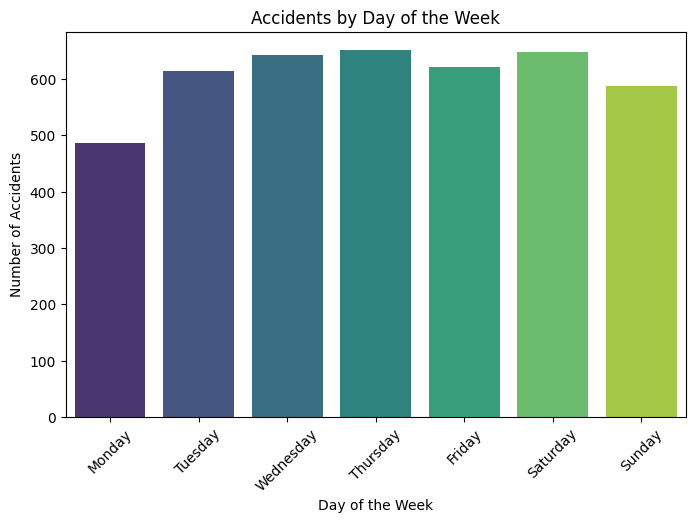

In [34]:
# Step 1: Analyze accidents by Day of the Week
accidents_by_day = borough_data['Day_of_Week'].value_counts().sort_index()
plt.figure(figsize=(8, 5))
sns.barplot(x=accidents_by_day.index, y=accidents_by_day.values, palette='viridis')
plt.title("Accidents by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Accidents")
plt.xticks(ticks=range(0, 7), labels=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], rotation=45)
plt.show()

The graph shows the number of accidents occurring on each day of the week, with higher numbers on Wednesday, Thursday, and Saturday, and the lowest on Monday. The trend suggests that mid-week and weekends are peak times for accidents.


### Analyzing Accidents by Time

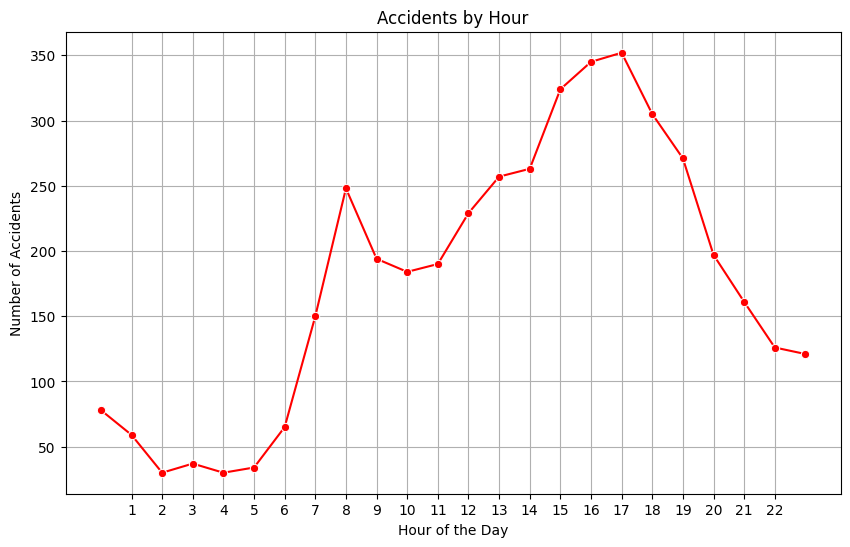

In [38]:
# Analyze accidents by Time (Hourly Distribution)
borough_data['Time'] = pd.to_datetime(borough_data['Time'], format='%H:%M')  # Convert to datetime
# Creating 'Hour' column from 'Time' column
borough_data['Hour'] = borough_data['Time'].dt.hour  # Extracts the hour from the 'Time' column
accidents_by_hour = borough_data['Hour'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
sns.lineplot(x=accidents_by_hour.index, y=accidents_by_hour.values, marker="o", color="red")
plt.title("Accidents by Hour")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Accidents")
plt.xticks(range(1, 23))
plt.grid()
plt.show()

##### We can see that most of the accidents occour when people goes to offices. Specifically, in office leaving time around 5pm 

### Analyzing Accidents by Time and Date

In [42]:
# Aggregating accidents by hour and day of the week
heatmap_data = borough_data.groupby(['Day_of_Week', 'Hour']).size().unstack(fill_value=0)

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True, fmt="d", linewidths=0.5)

# Adding titles and labels
plt.title("Accidents by Time and Day of the Week", fontsize=16)
plt.xlabel("Hour of the Day", fontsize=12)
plt.ylabel("Day of the Week", fontsize=12)
plt.yticks(ticks=[0, 1, 2, 3, 4, 5, 6], labels=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
plt.show()

### Analysis of the Heatmap

1. **Peak Accident Times**:  
   - Accidents are highest around **15:00 - 18:00** across most days, especially on **Wednesdays** and **Fridays**, indicating peak traffic hours.

2. **Day with Most Incidents**:  
   - **Wednesdays** have the highest number of accidents during these peak hours, suggesting potential workday-related congestion.

3. **Weekend Patterns**:  
   - Saturdays and Sundays show a more even distribution throughout the day, with slightly higher incidents in late afternoon (around **15:00 - 18:00**).

4. **Low Activity Periods**:  
   - Accidents are least frequent between **00:00 and 06:00**, which aligns with reduced traffic during early morning hours.

5. **Weekday Patterns**:  
   - Monday through Friday follow a similar trend, with accidents gradually increasing during the morning and peaking in the late afternoon.

### Conclusion
This heatmap highlights the importance of focusing on traffic management and safety measures during afternoon peak hours, particularly on workdays.


### Analyzing weather effect on Accidents

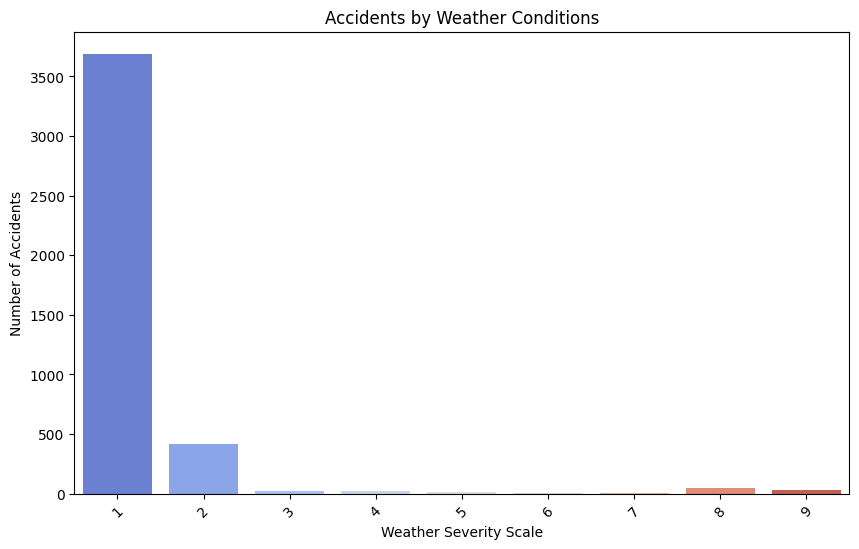

In [45]:
# Step 3: Analyze accidents by Weather Conditions
accidents_by_weather = borough_data['Weather_Conditions'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=accidents_by_weather.index, y=accidents_by_weather.values, palette='coolwarm')
plt.title("Accidents by Weather Conditions")
plt.xlabel("Weather Severity Scale")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45)
plt.show()

##### It completely unusual to see that most of the accident occour in Fine with no high wind weather showing no big involvement of weather, but it's people's own carelessness

In [48]:
# Visualizing light conditions vs severity

# Create a mapping dictionary
severity_mapping = {1: 'Fatal', 2: 'Serious', 3: 'Slight'}
# Map the severity values to their respective names
borough_data['Severity_Label'] = borough_data['Accident_Severity'].map(severity_mapping)

plt.figure(figsize=(8, 5))
sns.countplot(data=borough_data, x='Light_Conditions', hue='Severity_Label', palette='viridis')
plt.title("Accident Severity by Light Conditions")
plt.xlabel("Light Conditions Scale")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Severity", loc='upper right')
plt.show()

##### Accident Severity by Light Conditions

The chart illustrates the relationship between accident severity and light conditions, showing that most accidents occur under light condition "1" (likely daylight), with "Slight" accidents being the most common, followed by "Serious" and very few "Fatal" cases. As light conditions worsen (higher scale values), the frequency of accidents decreases significantly across all severities.


### Visualizing Weather conditions vs Severity

In [51]:
# Visualizing weather conditions vs severity

plt.figure(figsize=(8, 5))
sns.countplot(data=borough_data, x='Weather_Conditions', hue='Severity_Label', palette='coolwarm')
plt.title("Accident Severity by Weather Conditions")
plt.xlabel("Weather Severity Scale")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Severity", loc='upper right')
plt.show()

##### Most of the Accidents occour in Normal weather condition with Slight level of Severity

### Visiulizing Speed limit vs Severity

In [54]:
plt.figure(figsize=(12, 6))

# Strip plot for speed limits categorized by accident severity
sns.stripplot(data=borough_data, x='Accident_Severity', y='Speed_limit', palette='viridis', jitter=True, alpha=0.7)

# Adding title and labels
plt.title("Speed Limit vs. Accident Severity", fontsize=16)
plt.xlabel("Accident Severity", fontsize=12)
plt.ylabel("Speed Limit", fontsize=12)
plt.xticks(ticks=[0, 1, 2], labels=["Fatal", "Serious", "Slight"])
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

##### We can clearly get that most of the accidents have happened on normal speed limit. So we can say that people's are likely to follow the Speed limit rules. 

### Analyzing Vehicle and Casualty involvement

In [58]:
# Plotting the histogram for number of vehicles
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(borough_data['Number_of_Vehicles'], kde=True, color='blue', bins=30)
plt.title('Distribution of Vehicles Involved in Accidents', fontsize=14)
plt.xlabel('Number of Vehicles', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Plotting the histogram for number of casualties
plt.subplot(1, 2, 2)
sns.histplot(borough_data['Number_of_Casualties'], kde=True, color='red', bins=30)
plt.title('Distribution of Casualties Involved in Accidents', fontsize=14)
plt.xlabel('Number of Casualties', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.tight_layout()
plt.show()

#### Insights from Histograms of Vehicles and Casualties Involved in Accidents

1. **Vehicles Involved:** The majority of accidents involve either one or two vehicles, as shown by the high frequency of these values in the histogram. Involvement of three or more vehicles is significantly less frequent, and the distribution tails off sharply after two vehicles.
   
2. **Casualties Involved:** Most accidents result in only one casualty, as evident from the steep peak at "1" in the histogram. Accidents with two or more casualties occur much less frequently, with the distribution declining rapidly as the number of casualties increases.

If pie charts were created, they would highlight the overwhelming proportion of accidents involving one or two vehicles and a single casualty. However, the histograms provide a more detailed view of the exact distributions.


### Checking Geographical distribution of accidents on a map

In [62]:
# Filtering out rows with missing Latitude or Longitude values
df_clean = borough_data.dropna(subset=['Latitude', 'Longitude'])

# Creating a map centered around the average location of all accidents
map_center = [df_clean['Latitude'].mean(), df_clean['Longitude'].mean()]
accident_map = folium.Map(location=map_center, zoom_start=10)

# Adding markers or heatmap based on Longitude and Latitude
for _, row in df_clean.iterrows():
    folium.CircleMarker(location=[row['Latitude'], row['Longitude']],
                        radius=3,
                        color='red',
                        fill=True,
                        fill_color='red',
                        fill_opacity=0.6).add_to(accident_map)

# Alternatively, adding a heatmap for higher density areas
heat_data = [[row['Latitude'], row['Longitude']] for _, row in df_clean.iterrows()]
HeatMap(heat_data).add_to(accident_map)

# Save the map as an HTML file to view in a browser (optional)
#accident_map.save('accident_geographical_distribution.html')

# Displaying the map in Jupyter Notebook 
accident_map

##### Accident Frequency on Map

- Most of the Accidents occur around Green Lanes Highway and High Road and on these roads the hotspot point is around the Junction of High Road, Westbury Avenue, and Turnpike Lane. After these road and their juction, the other hotspotted points are also junctions like, the jucntion that connects Wightman Road with Hornsey Park Road along with Turnpike Lane.

# Data Preprocessing

In [67]:
borough_data.head(2).T

2782  \
Location_Easting_OSGR                                     530760   
Location_Northing_OSGR                                    187400   
Longitude                                              -0.114643   
Latitude                                               51.570263   
Police_Force                                                   1   
Accident_Severity                                              2   
Number_of_Vehicles                                             1   
Number_of_Casualties                                           1   
Date                                                  01/03/2005   
Day_of_Week                                                    3   
Time                                         1900-01-01 17:45:00   
Local_Authority_District                                      31   
1st_Road_Class                                                 3   
1st_Road_Number                                             1201   
Road_Type                                                      6   
Speed_limit                                                   30   
Junction_Detail                                                0   
Junction_Control                                              -1   
2nd_Road_Class                                                -1   
2nd_Road_Number                                                0   
Pedestrian_Crossing-Human_Control                              0   
Pedestrian_Crossing-Physical_Facilities                        0   
Light_Conditions                                               1   
Weather_Conditions                                             1   
Road_Surface_Conditions                                        1   
Special_Conditions_at_Site                                     0   
Carriageway_Hazards                                            0   
Urban_or_Rural_Area                                            1   
Did_Police_Officer_Attend_Scene_of_Accident                    3   
LSOA_of_Accident_Location                              E01002805   
Hour                                                          17   
Severity_Label                                           Serious   

                                                            2917  
Location_Easting_OSGR                                     531030  
Location_Northing_OSGR                                    187210  
Longitude                                              -0.110821  
Latitude                                               51.568493  
Police_Force                                                   1  
Accident_Severity                                              3  
Number_of_Vehicles                                             1  
Number_of_Casualties                                           1  
Date                                                  04/04/2005  
Day_of_Week                                                    2  
Time                                         1900-01-01 15:30:00  
Local_Authority_District                                      31  
1st_Road_Class                                                 5  
1st_Road_Number                                                0  
Road_Type                                                      6  
Speed_limit                                                   30  
Junction_Detail                                                6  
Junction_Control                                               2  
2nd_Road_Class                                                 3  
2nd_Road_Number                                             1201  
Pedestrian_Crossing-Human_Control                              0  
Pedestrian_Crossing-Physical_Facilities                        5  
Light_Conditions                                               1  
Weather_Conditions                                             1  
Road_Surface_Conditions                                        1  
Special_Conditions_at_Site                                     0  
Carria

In [69]:
borough_data.dtypes

Location_Easting_OSGR                                   int64
Location_Northing_OSGR                                  int64
Longitude                                             float64
Latitude                                              float64
Police_Force                                            int64
Accident_Severity                                       int64
Number_of_Vehicles                                      int64
Number_of_Casualties                                    int64
Date                                                   object
Day_of_Week                                             int64
Time                                           datetime64[ns]
Local_Authority_District                                int64
1st_Road_Class                                          int64
1st_Road_Number                                         int64
Road_Type                                               int64
Speed_limit                                             int64
Junction

Converting Date column from object type to Date type in order of use it as time series

In [71]:
# converting Date column from object type to Date type
borough_data['Date'] = pd.to_datetime(borough_data['Date'], dayfirst = True)

In [72]:
# Creating 'Month' column from 'Date' column
borough_data['Month'] = borough_data['Date'].dt.month  # Extracts the month from the 'Date' column

In [73]:
borough_data.head(2).T

2782  \
Location_Easting_OSGR                                     530760   
Location_Northing_OSGR                                    187400   
Longitude                                              -0.114643   
Latitude                                               51.570263   
Police_Force                                                   1   
Accident_Severity                                              2   
Number_of_Vehicles                                             1   
Number_of_Casualties                                           1   
Date                                         2005-03-01 00:00:00   
Day_of_Week                                                    3   
Time                                         1900-01-01 17:45:00   
Local_Authority_District                                      31   
1st_Road_Class                                                 3   
1st_Road_Number                                             1201   
Road_Type                                                      6   
Speed_limit                                                   30   
Junction_Detail                                                0   
Junction_Control                                              -1   
2nd_Road_Class                                                -1   
2nd_Road_Number                                                0   
Pedestrian_Crossing-Human_Control                              0   
Pedestrian_Crossing-Physical_Facilities                        0   
Light_Conditions                                               1   
Weather_Conditions                                             1   
Road_Surface_Conditions                                        1   
Special_Conditions_at_Site                                     0   
Carriageway_Hazards                                            0   
Urban_or_Rural_Area                                            1   
Did_Police_Officer_Attend_Scene_of_Accident                    3   
LSOA_of_Accident_Location                              E01002805   
Hour                                                          17   
Severity_Label                                           Serious   
Month                                                          3   

                                                            2917  
Location_Easting_OSGR                                     531030  
Location_Northing_OSGR                                    187210  
Longitude                                              -0.110821  
Latitude                                               51.568493  
Police_Force                                                   1  
Accident_Severity                                              3  
Number_of_Vehicles                                             1  
Number_of_Casualties                                           1  
Date                                         2005-04-04 00:00:00  
Day_of_Week                                                    2  
Time                                         1900-01-01 15:30:00  
Local_Authority_District                                      31  
1st_Road_Class                                                 5  
1st_Road_Number                                                0  
Road_Type                                                      6  
Speed_limit                                                   30  
Junction_Detail                                                6  
Junction_Control                                               2  
2nd_Road_Class                                                 3  
2nd_Road_Number                                             1201  
Pedestrian_Crossing-Human_Control                              0  
Pedestrian_Crossing-Physical_Facilities                        5  
Light_Conditions                                               1  
Weather_Conditions                                             1  
Road_Surface_Conditions                                        1  
Speci

### Statistical Summary of Data

In [76]:
# checking Statistical summary of the numeric columns
borough_data.describe().T

count  \
Location_Easting_OSGR                        4250.0   
Location_Northing_OSGR                       4250.0   
Longitude                                    4250.0   
Latitude                                     4250.0   
Police_Force                                 4250.0   
Accident_Severity                            4250.0   
Number_of_Vehicles                           4250.0   
Number_of_Casualties                         4250.0   
Date                                           4250   
Day_of_Week                                  4250.0   
Time                                           4250   
Local_Authority_District                     4250.0   
1st_Road_Class                               4250.0   
1st_Road_Number                              4250.0   
Road_Type                                    4250.0   
Speed_limit                                  4250.0   
Junction_Detail                              4250.0   
Junction_Control                             4250.0   
2nd_Road_Class                               4250.0   
2nd_Road_Number                              4250.0   
Pedestrian_Crossing-Human_Control            4250.0   
Pedestrian_Crossing-Physical_Facilities      4250.0   
Light_Conditions                             4250.0   
Weather_Conditions                           4250.0   
Road_Surface_Conditions                      4250.0   
Special_Conditions_at_Site                   4250.0   
Carriageway_Hazards                          4250.0   
Urban_or_Rural_Area                          4250.0   
Did_Police_Officer_Attend_Scene_of_Accident  4250.0   
Hour                                         4250.0   
Month                                        4250.0   

                                                                      mean  \
Location_Easting_OSGR                                        531839.089412   
Location_Northing_OSGR                                           189673.92   
Longitude                                                        -0.098228   
Latitude                                                         51.590444   
Police_Force                                                           1.0   
Accident_Severity                                                 2.873176   
Number_of_Vehicles                                                1.734588   
Number_of_Casualties                                              1.208471   
Date                                         2008-01-25 03:33:27.529411584   
Day_of_Week                                                       4.082824   
Time                                         1900-01-01 14:23:17.449411840   
Local_Authority_District                                              31.0   
1st_Road_Class                                                    3.712941   
1st_Road_Number                                                 247.504941   
Road_Type                                                         5.686118   
Speed_limit                                                      30.138824   
Junction_Detail                                                   2.820706   
Junction_Control                                                  2.285176   
2nd_Road_Class                                                    3.453882   
2nd_Road_Number                                                  67.067059   
Pedestrian_Crossing-Human_Control                                    0.004   
Pedestrian_Crossing-Physical_Facilities                           1.327294   
Light_Conditions                                                  1.887765   
Weather_Conditions                                                1.288706   
Road_Surface_Conditions                                           1.186118   
Special_Conditions_at_Site                                        0.032706   
Carriageway_Hazards                                               0.017882   
Urban_or_Rural_Area                                                    1.0   
Did_Police_Officer_Atte

The statistical summary describes key metrics for various accident-related features. It shows data distributions for geographic coordinates, accident severity, road and weather conditions, and timing information. Most fields have relatively low standard deviations, indicating concentrated data values, except for variables like road numbers and the number of casualties, which exhibit broader variability.

In [78]:
# checking Statistical summary of object type columns
borough_data.describe(include=['object'])

LSOA_of_Accident_Location Severity_Label
count                       4244           4250
unique                       151              3
top                    E01002003         Slight
freq                         212           3740

### Dealing with Null values

Replacing all occurrences of -1 with NaN because it represent Null or missing values in the data

In [81]:
# Replacing all occurrences of -1 with NaN 
borough_data.replace(-1, np.nan, inplace=True)

In [82]:
# number of missing values in each column
borough_data.isna().sum()

Location_Easting_OSGR                             0
Location_Northing_OSGR                            0
Longitude                                         0
Latitude                                          0
Police_Force                                      0
Accident_Severity                                 0
Number_of_Vehicles                                0
Number_of_Casualties                              0
Date                                              0
Day_of_Week                                       0
Time                                              0
Local_Authority_District                          0
1st_Road_Class                                    0
1st_Road_Number                                   0
Road_Type                                         0
Speed_limit                                       0
Junction_Detail                                   0
Junction_Control                               1165
2nd_Road_Class                                 1166
2nd_Road_Num

In [83]:
# checking percentage of missing values in each column
missing_values = borough_data.isnull().sum()
print(missing_values / len(borough_data)  * 100)

Location_Easting_OSGR                           0.000000
Location_Northing_OSGR                          0.000000
Longitude                                       0.000000
Latitude                                        0.000000
Police_Force                                    0.000000
Accident_Severity                               0.000000
Number_of_Vehicles                              0.000000
Number_of_Casualties                            0.000000
Date                                            0.000000
Day_of_Week                                     0.000000
Time                                            0.000000
Local_Authority_District                        0.000000
1st_Road_Class                                  0.000000
1st_Road_Number                                 0.000000
Road_Type                                       0.000000
Speed_limit                                     0.000000
Junction_Detail                                 0.000000
Junction_Control               

Since Junction_Control and 2nd_Road_class has so many missing vlaues, we dicided to drop these columns

In [85]:
borough_data = borough_data.drop(['Junction_Control', '2nd_Road_Class'], axis=1)

Filling LSOA_of_Accident_Location columns with its mode value

In [87]:
# Filling LSOA_of_Accident_Location columns with its most frequent values

borough_data['LSOA_of_Accident_Location'] = borough_data['LSOA_of_Accident_Location'].fillna(borough_data['LSOA_of_Accident_Location'].mode)

In [89]:
# filling the remaining 3 columns with thier avarage values as they are float type

borough_data['2nd_Road_Number'] = borough_data['2nd_Road_Number'].fillna(borough_data['2nd_Road_Number'].mean())
borough_data['Road_Surface_Conditions'] = borough_data['Road_Surface_Conditions'].fillna(borough_data['Road_Surface_Conditions'].mean())
borough_data['Carriageway_Hazards'] = borough_data['Carriageway_Hazards'].fillna(borough_data['Carriageway_Hazards'].mean())

In [90]:
# checking if values are successfully imputed
borough_data.isna().sum()

Location_Easting_OSGR                          0
Location_Northing_OSGR                         0
Longitude                                      0
Latitude                                       0
Police_Force                                   0
Accident_Severity                              0
Number_of_Vehicles                             0
Number_of_Casualties                           0
Date                                           0
Day_of_Week                                    0
Time                                           0
Local_Authority_District                       0
1st_Road_Class                                 0
1st_Road_Number                                0
Road_Type                                      0
Speed_limit                                    0
Junction_Detail                                0
2nd_Road_Number                                0
Pedestrian_Crossing-Human_Control              0
Pedestrian_Crossing-Physical_Facilities        0
Light_Conditions    

### Checking Distributions of Numeric Columns

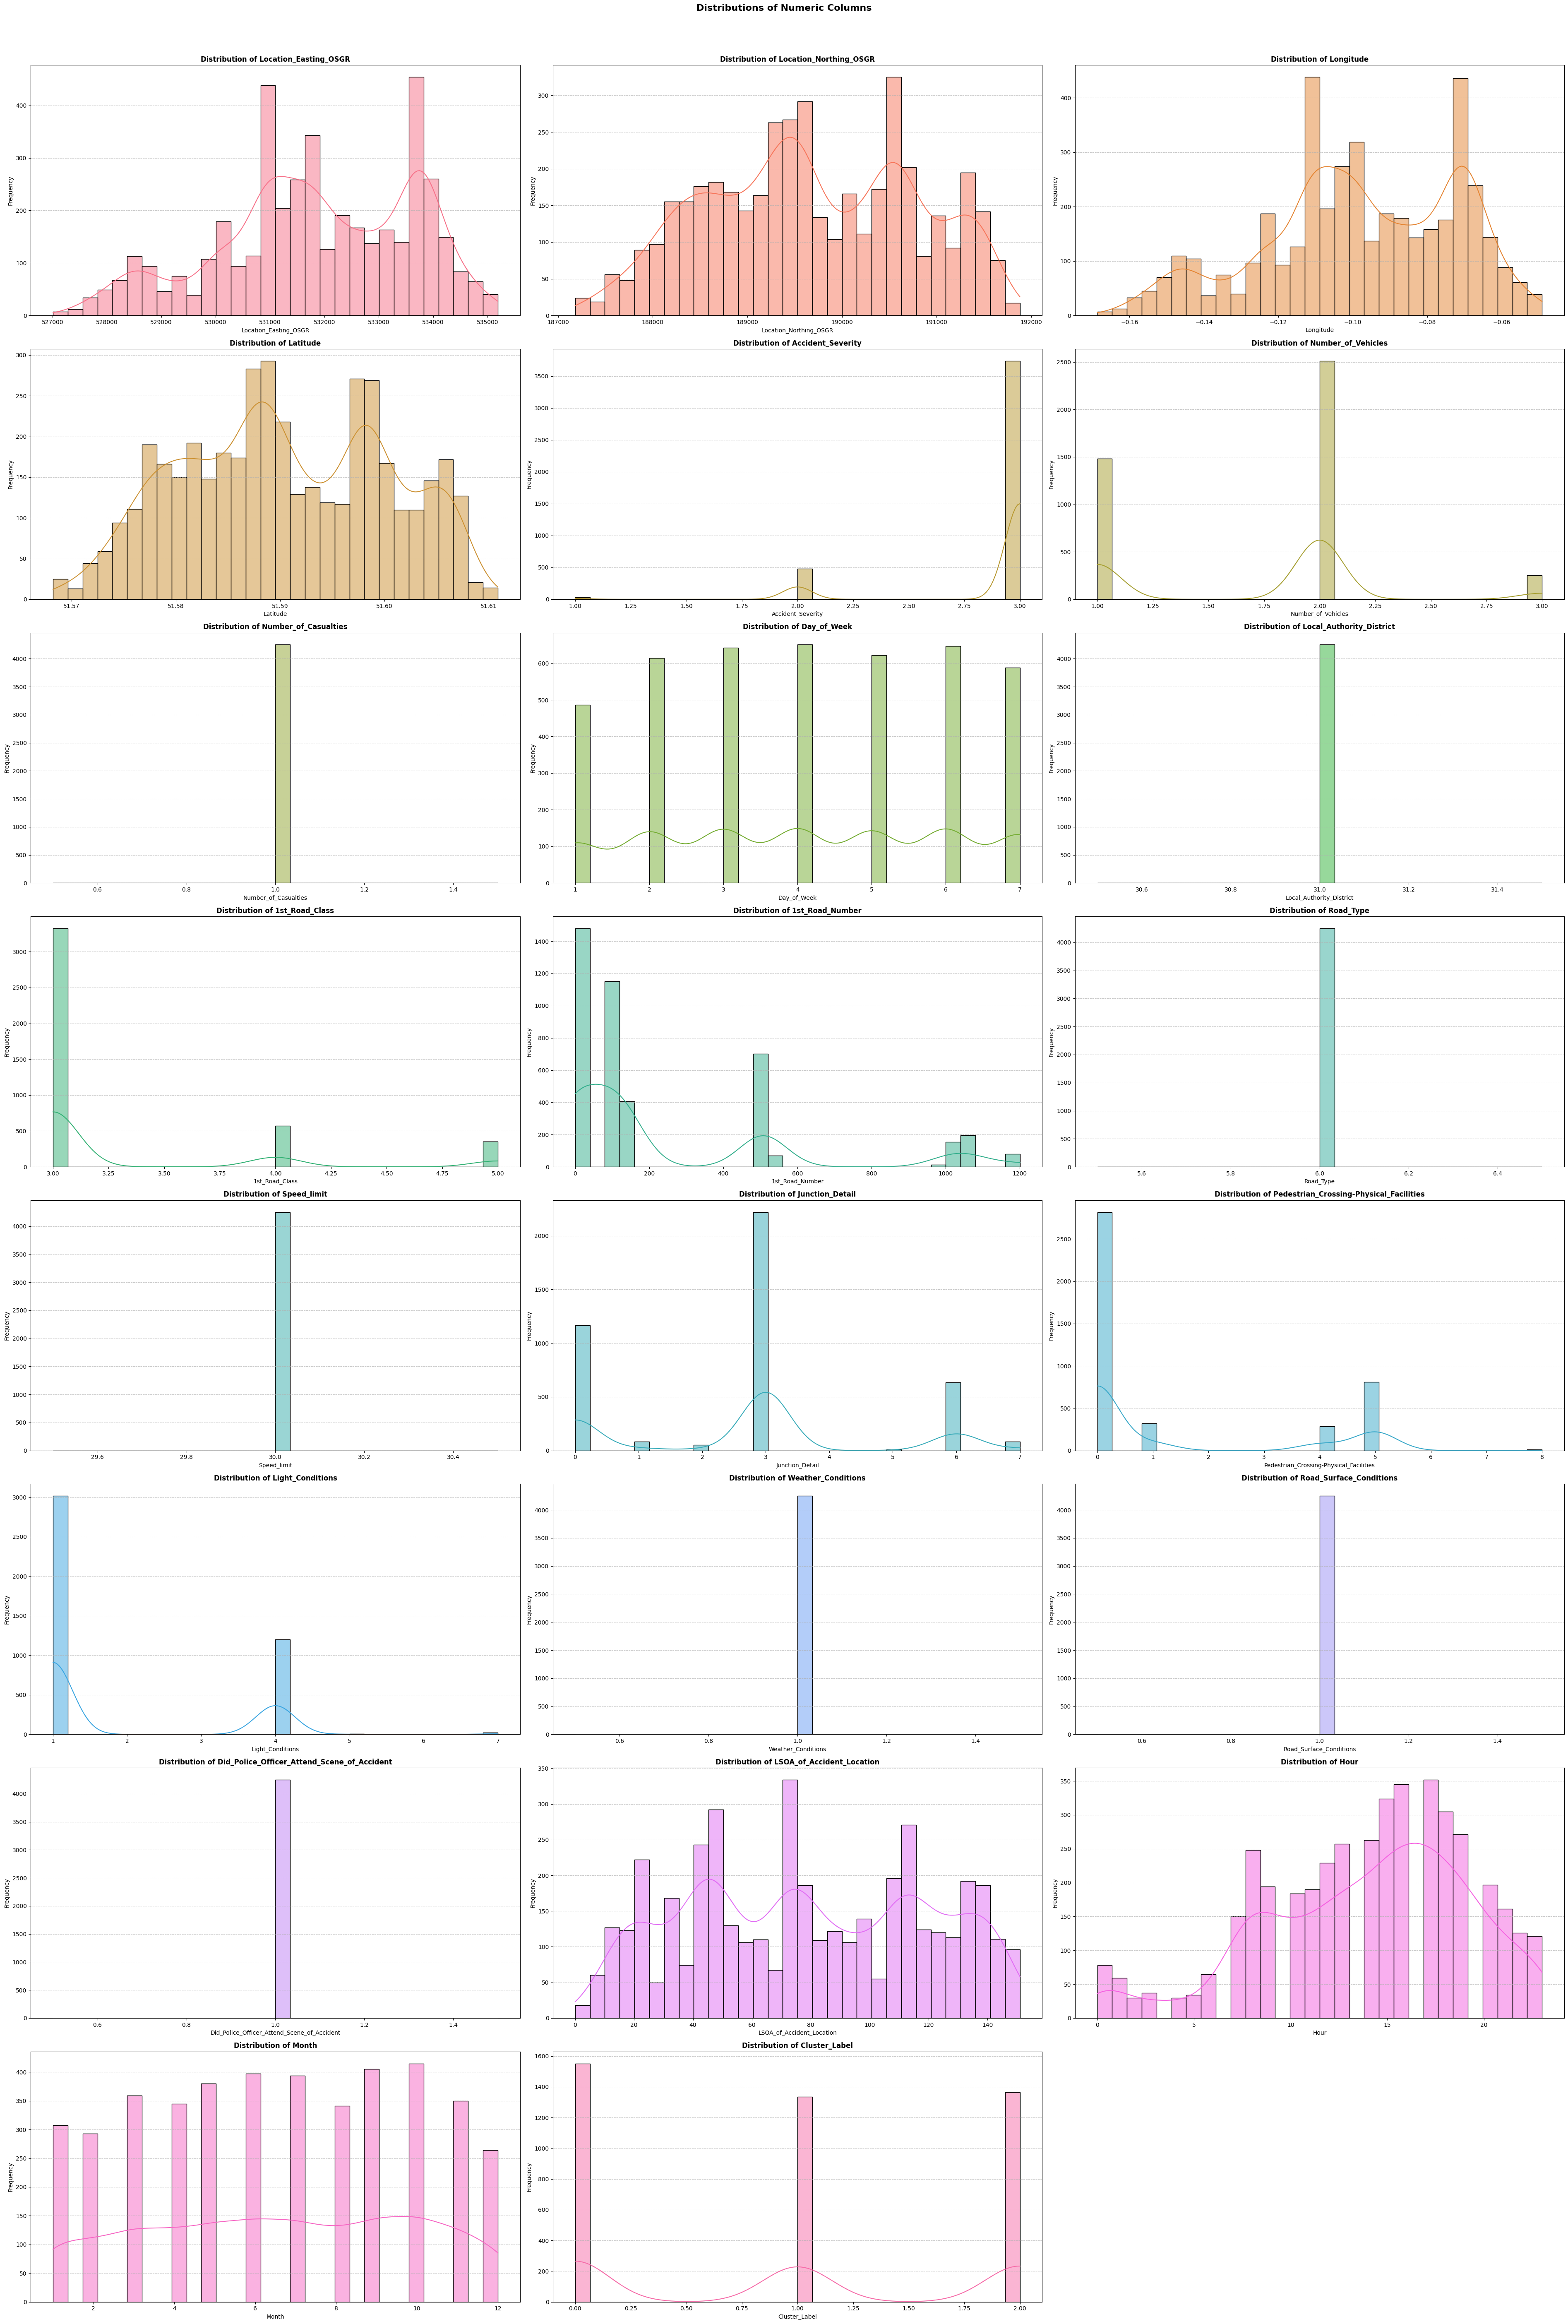

In [329]:
import seaborn as sns
import matplotlib.pyplot as plt

# Identifying numeric columns
numeric_columns = borough_data.select_dtypes(include=['number', 'float']).columns

# Define a color palette
palette = sns.color_palette("husl", len(numeric_columns))

# Plot distributions for numeric columns
plt.figure(figsize=(38, 55))
for i, (column, color) in enumerate(zip(numeric_columns, palette), 1):
    plt.subplot((len(numeric_columns) // 3) + 1, 3, i)  # Adjust layout based on the number of columns
    sns.histplot(
        borough_data[column],
        kde=True,
        color=color,
        bins=30,
        edgecolor='black'
    )
    plt.title(f'Distribution of {column}', fontsize=12, weight='bold')
    plt.xlabel(column, fontsize=10)
    plt.ylabel('Frequency', fontsize=10)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout and aesthetics
plt.tight_layout()
plt.suptitle('Distributions of Numeric Columns', fontsize=16, weight='bold', y=1.02)
plt.show()

In [107]:
from scipy.stats import skew

# Calculating and displaying Skewness of each numeric column

skewness = borough_data[numeric_columns].apply(skew)

print("\nSkewness for numeric columns:")
print(skewness)


Skewness for numeric columns:
Location_Easting_OSGR                          -0.364700
Location_Northing_OSGR                         -0.020848
Longitude                                      -0.367156
Latitude                                       -0.003323
Police_Force                                    0.000000
Accident_Severity                              -2.698924
Number_of_Vehicles                              0.733315
Number_of_Casualties                            3.930989
Day_of_Week                                    -0.031286
Local_Authority_District                        0.000000
1st_Road_Class                                  1.217073
1st_Road_Number                                 1.533926
Road_Type                                      -2.911906
Speed_limit                                     6.958773
Junction_Detail                                 0.462944
2nd_Road_Number                                 3.849277
Pedestrian_Crossing-Human_Control              22.285910


## Skewness Report Summary

Most columns are close to symmetric (skewness near 0), such as `Longitude`, `Latitude`, and `Day_of_Week`. Some features, like `Number_of_Vehicles` and `1st_Road_Class`, show moderate positive skewness. Others, such as `Accident_Severity` and `Road_Type`, are highly negatively skewed.  

Columns like `Speed_limit`, `Pedestrian_Crossing-Human_Control`, and `Carriageway_Hazards` exhibit extreme positive skewness, suggesting significant outliers or long right tails.


### Checking Distribution of Categorical columns

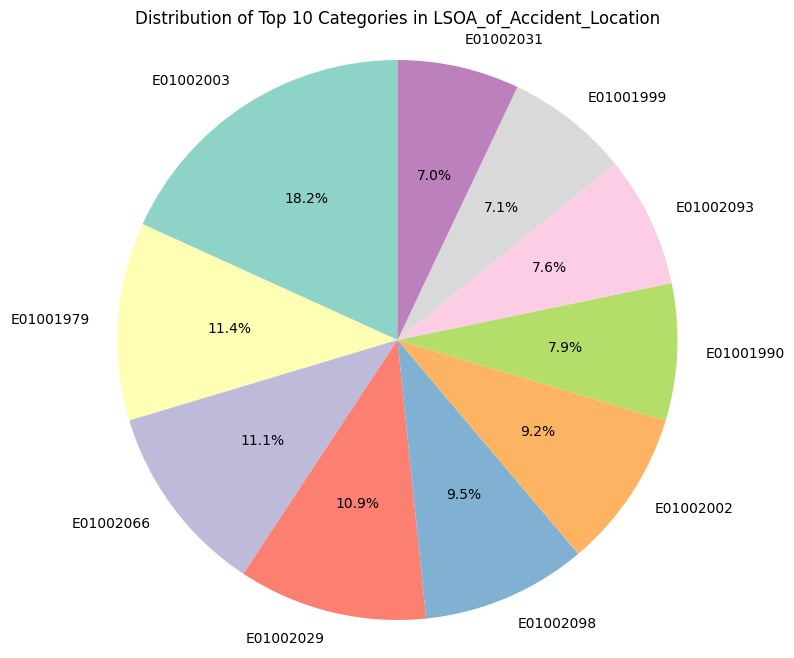

In [110]:
# Identifying the categorical column 
categorical_column = borough_data.select_dtypes(include=['object']).columns[0]

# Getting the value counts of the categorical column and sort them
value_counts = borough_data[categorical_column].value_counts()

# Keeping only the top 10 values
top_10 = value_counts.head(10)

# Plotting the pie chart for the top 10 categories
plt.figure(figsize=(10, 8))
plt.pie(top_10, labels=top_10.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3", len(top_10)))
plt.title(f'Distribution of Top 10 Categories in {categorical_column}')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular

# Show the pie chart
plt.show()

In [111]:
len(borough_data['LSOA_of_Accident_Location'].unique())

152

##### As there were so many missing values that's why we showed the distribution of top 10 values

### Detecting Outliers

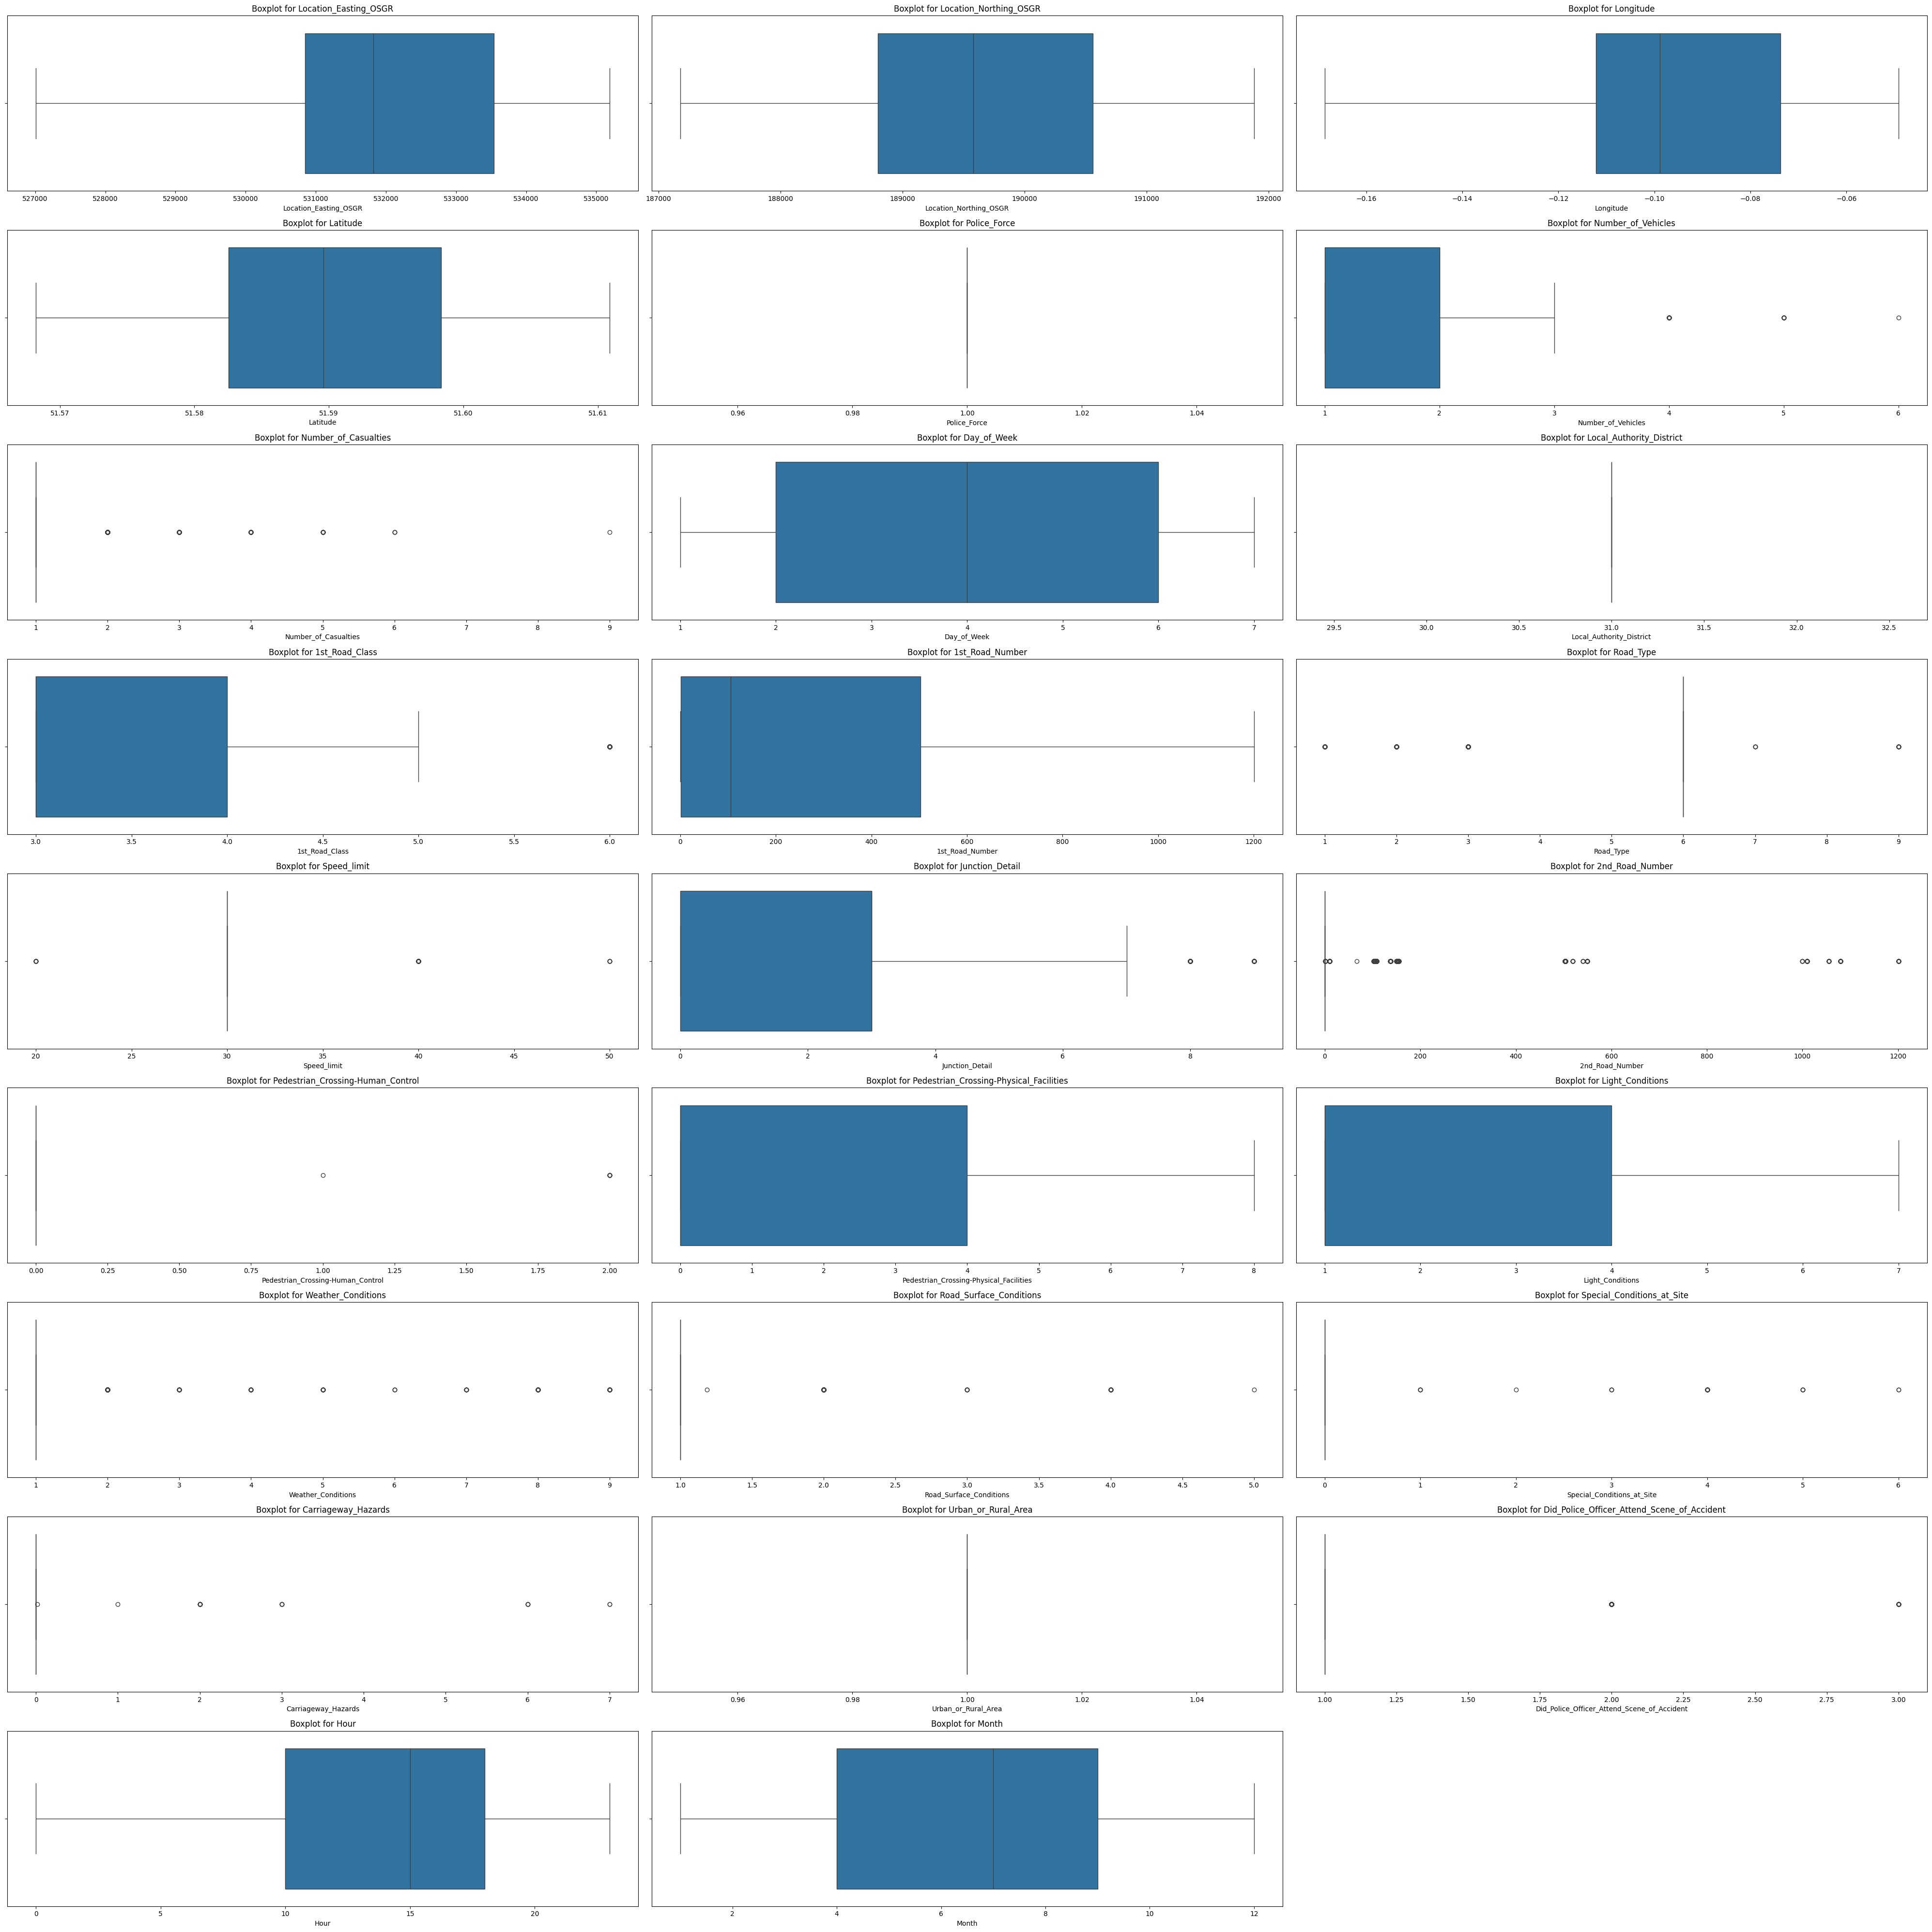

In [118]:
# Detecting outliers using IQR (Interquartile Range)
numeric_columns = numeric_columns.drop('Accident_Severity')
outliers_iqr = {}
for column in numeric_columns:
    Q1 = borough_data[column].quantile(0.25)
    Q3 = borough_data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers_iqr[column] = borough_data[(borough_data[column] < lower_bound) | (borough_data[column] > upper_bound)]

# Visualizing outliers using Boxplots
plt.figure(figsize=(40, 40))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(len(numeric_columns)//3 + 1, 3, i)  # Adjust layout based on the number of columns
    sns.boxplot(data=borough_data, x=column)
    plt.title(f'Boxplot for {column}')
    plt.tight_layout()

# Showing the plots
plt.show()

### Imputing Outliers 

In [121]:
# Defining a function to remove outliers based on IQR
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Defining a function to impute outliers based on IQR
def impute_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Imputing with the median within the range
    df[column] = np.where(df[column] < lower_bound, df[column].median(), df[column])
    df[column] = np.where(df[column] > upper_bound, df[column].median(), df[column])
    return df

# Removing outliers based on IQR for each numeric column
df_no_outliers = borough_data.copy()
for column in numeric_columns:
    df_no_outliers = remove_outliers_iqr(df_no_outliers, column)

# Imputing outliers based on IQR for each numeric column
borough_data = borough_data.copy()
for column in numeric_columns:
    df_imputed = impute_outliers_iqr(borough_data, column)

# Checking the difference in the shapes of the dataframes
print(f"Original dataframe shape: {borough_data.shape}")
print(f"Dataframe after removing outliers: {df_no_outliers.shape}")
print(f"Dataframe after imputing outliers: {borough_data.shape}")

Original dataframe shape: (4250, 31)
Dataframe after removing outliers: (1083, 31)
Dataframe after imputing outliers: (4250, 31)


##### As there can be crealy seen that removing outliers will results in loss of vast amount of data that's why we decided to use the imputed data

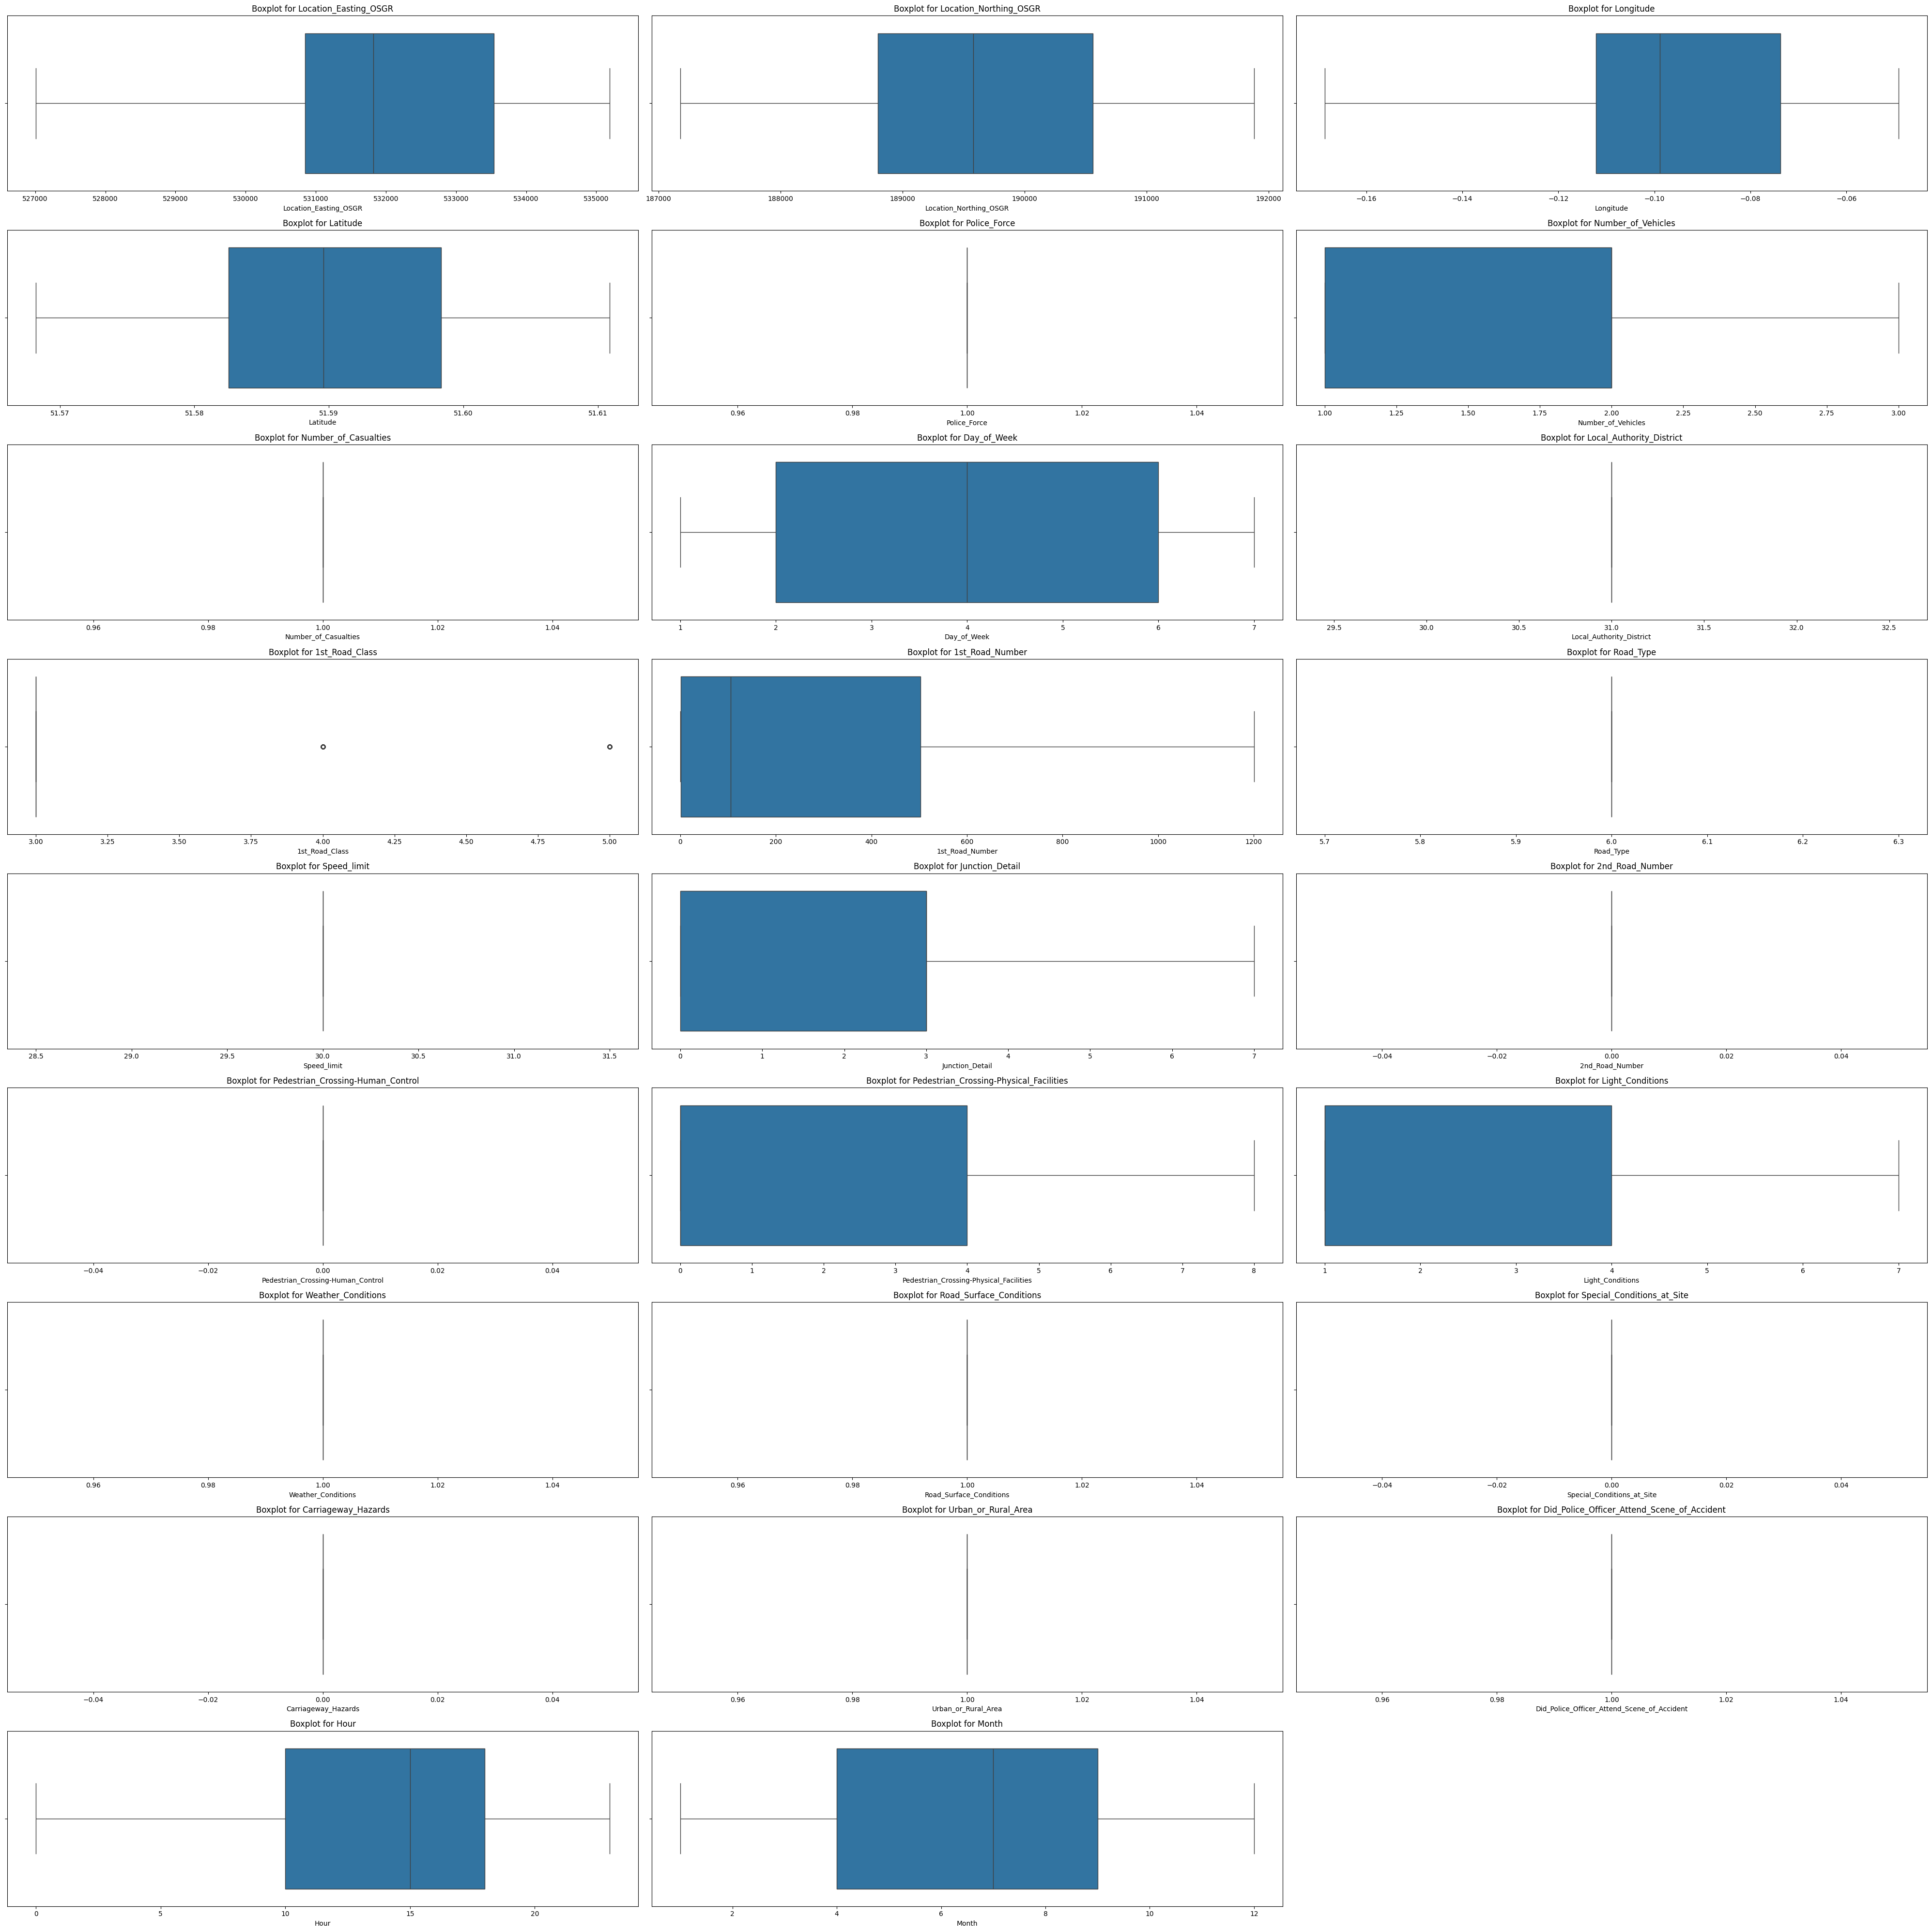

In [124]:
# Visualizing outliers using Boxplots
plt.figure(figsize=(40, 40))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(len(numeric_columns)//3 + 1, 3, i)  # Adjust layout based on the number of columns
    sns.boxplot(data=borough_data, x=column)
    plt.title(f'Boxplot for {column}')
    plt.tight_layout()

# Showing the plots
plt.show()

### Checking for outliers in Categorical columns

In [127]:
borough_data['LSOA_of_Accident_Location'].unique()

array(['E01002805', 'E01002008', 'E01002065', 'E01002055', 'E01002002',
       'E01001995', 'E01002066', 'E01001963', 'E01001966', 'E01002054',
       'E01002094', 'E01002003', 'E01002088', 'E01001990', 'E01001975',
       'E01002067', 'E01002020', 'E01002044', 'E01002098', 'E01002031',
       'E01001999', 'E01002075', 'E01002103', 'E01002007', 'E01002042',
       'E01002069', 'E01001970', 'E01001985', 'E01002080', 'E01002099',
       'E01002077', 'E01002028', 'E01002032', 'E01001973', 'E01001391',
       'E01002034', 'E01001991', 'E01002072', 'E01002048', 'E01002095',
       'E01002058', 'E01001996', 'E01001962', 'E01002026', 'E01002068',
       'E01002043', 'E01002074', 'E01001989', 'E01002078', 'E01002014',
       'E01002097', 'E01002062', 'E01002056', 'E01001969', 'E01002051',
       'E01002022', 'E01002082', 'E01001986', 'E01001979', 'E01002011',
       'E01002100', 'E01001978', 'E01002013', 'E01001997', 'E01002096',
       'E01002084', 'E01002071', 'E01001976', 'E01002038', 'E010

##### Because it is an ID columns with 152 Unique values that's why we're unable to show the outliers of this column.

### Label Encoding

In [131]:
borough_data['LSOA_of_Accident_Location'] = borough_data['LSOA_of_Accident_Location'].astype(str)

Applying Label Encoding on LSOA_of_Accident_Location to make it numeric and to check it's correlation with other columns

In [134]:
# Initializing the label encoder
label_encoder = LabelEncoder()

borough_data['LSOA_of_Accident_Location'] = label_encoder.fit_transform(borough_data['LSOA_of_Accident_Location'])

In [136]:
borough_data.head(2).T

2782  \
Location_Easting_OSGR                                   530760.0   
Location_Northing_OSGR                                  187400.0   
Longitude                                              -0.114643   
Latitude                                               51.570263   
Police_Force                                                 1.0   
Accident_Severity                                              2   
Number_of_Vehicles                                           1.0   
Number_of_Casualties                                         1.0   
Date                                         2005-03-01 00:00:00   
Day_of_Week                                                  3.0   
Time                                         1900-01-01 17:45:00   
Local_Authority_District                                    31.0   
1st_Road_Class                                               3.0   
1st_Road_Number                                           1201.0   
Road_Type                                                    6.0   
Speed_limit                                                 30.0   
Junction_Detail                                              0.0   
2nd_Road_Number                                              0.0   
Pedestrian_Crossing-Human_Control                            0.0   
Pedestrian_Crossing-Physical_Facilities                      0.0   
Light_Conditions                                             1.0   
Weather_Conditions                                           1.0   
Road_Surface_Conditions                                      1.0   
Special_Conditions_at_Site                                   0.0   
Carriageway_Hazards                                          0.0   
Urban_or_Rural_Area                                          1.0   
Did_Police_Officer_Attend_Scene_of_Accident                  1.0   
LSOA_of_Accident_Location                                    151   
Hour                                                        17.0   
Severity_Label                                           Serious   
Month                                                        3.0   

                                                            2917  
Location_Easting_OSGR                                   531030.0  
Location_Northing_OSGR                                  187210.0  
Longitude                                              -0.110821  
Latitude                                               51.568493  
Police_Force                                                 1.0  
Accident_Severity                                              3  
Number_of_Vehicles                                           1.0  
Number_of_Casualties                                         1.0  
Date                                         2005-04-04 00:00:00  
Day_of_Week                                                  2.0  
Time                                         1900-01-01 15:30:00  
Local_Authority_District                                    31.0  
1st_Road_Class                                               5.0  
1st_Road_Number                                              0.0  
Road_Type                                                    6.0  
Speed_limit                                                 30.0  
Junction_Detail                                              6.0  
2nd_Road_Number                                              0.0  
Pedestrian_Crossing-Human_Control                            0.0  
Pedestrian_Crossing-Physical_Facilities                      5.0  
Light_Conditions                                             1.0  
Weather_Conditions                                           1.0  
Road_Surface_Conditions                                      1.0  
Special_Conditions_at_Site                                   0.0  
Carriageway_Hazards                                          0.0  
Urban_or_Rural_Area                                          1.0  
Did_Police_Officer_Attend_Scene_of_Accident                  1.0  
LSOA_of

### Pairwise Correlation

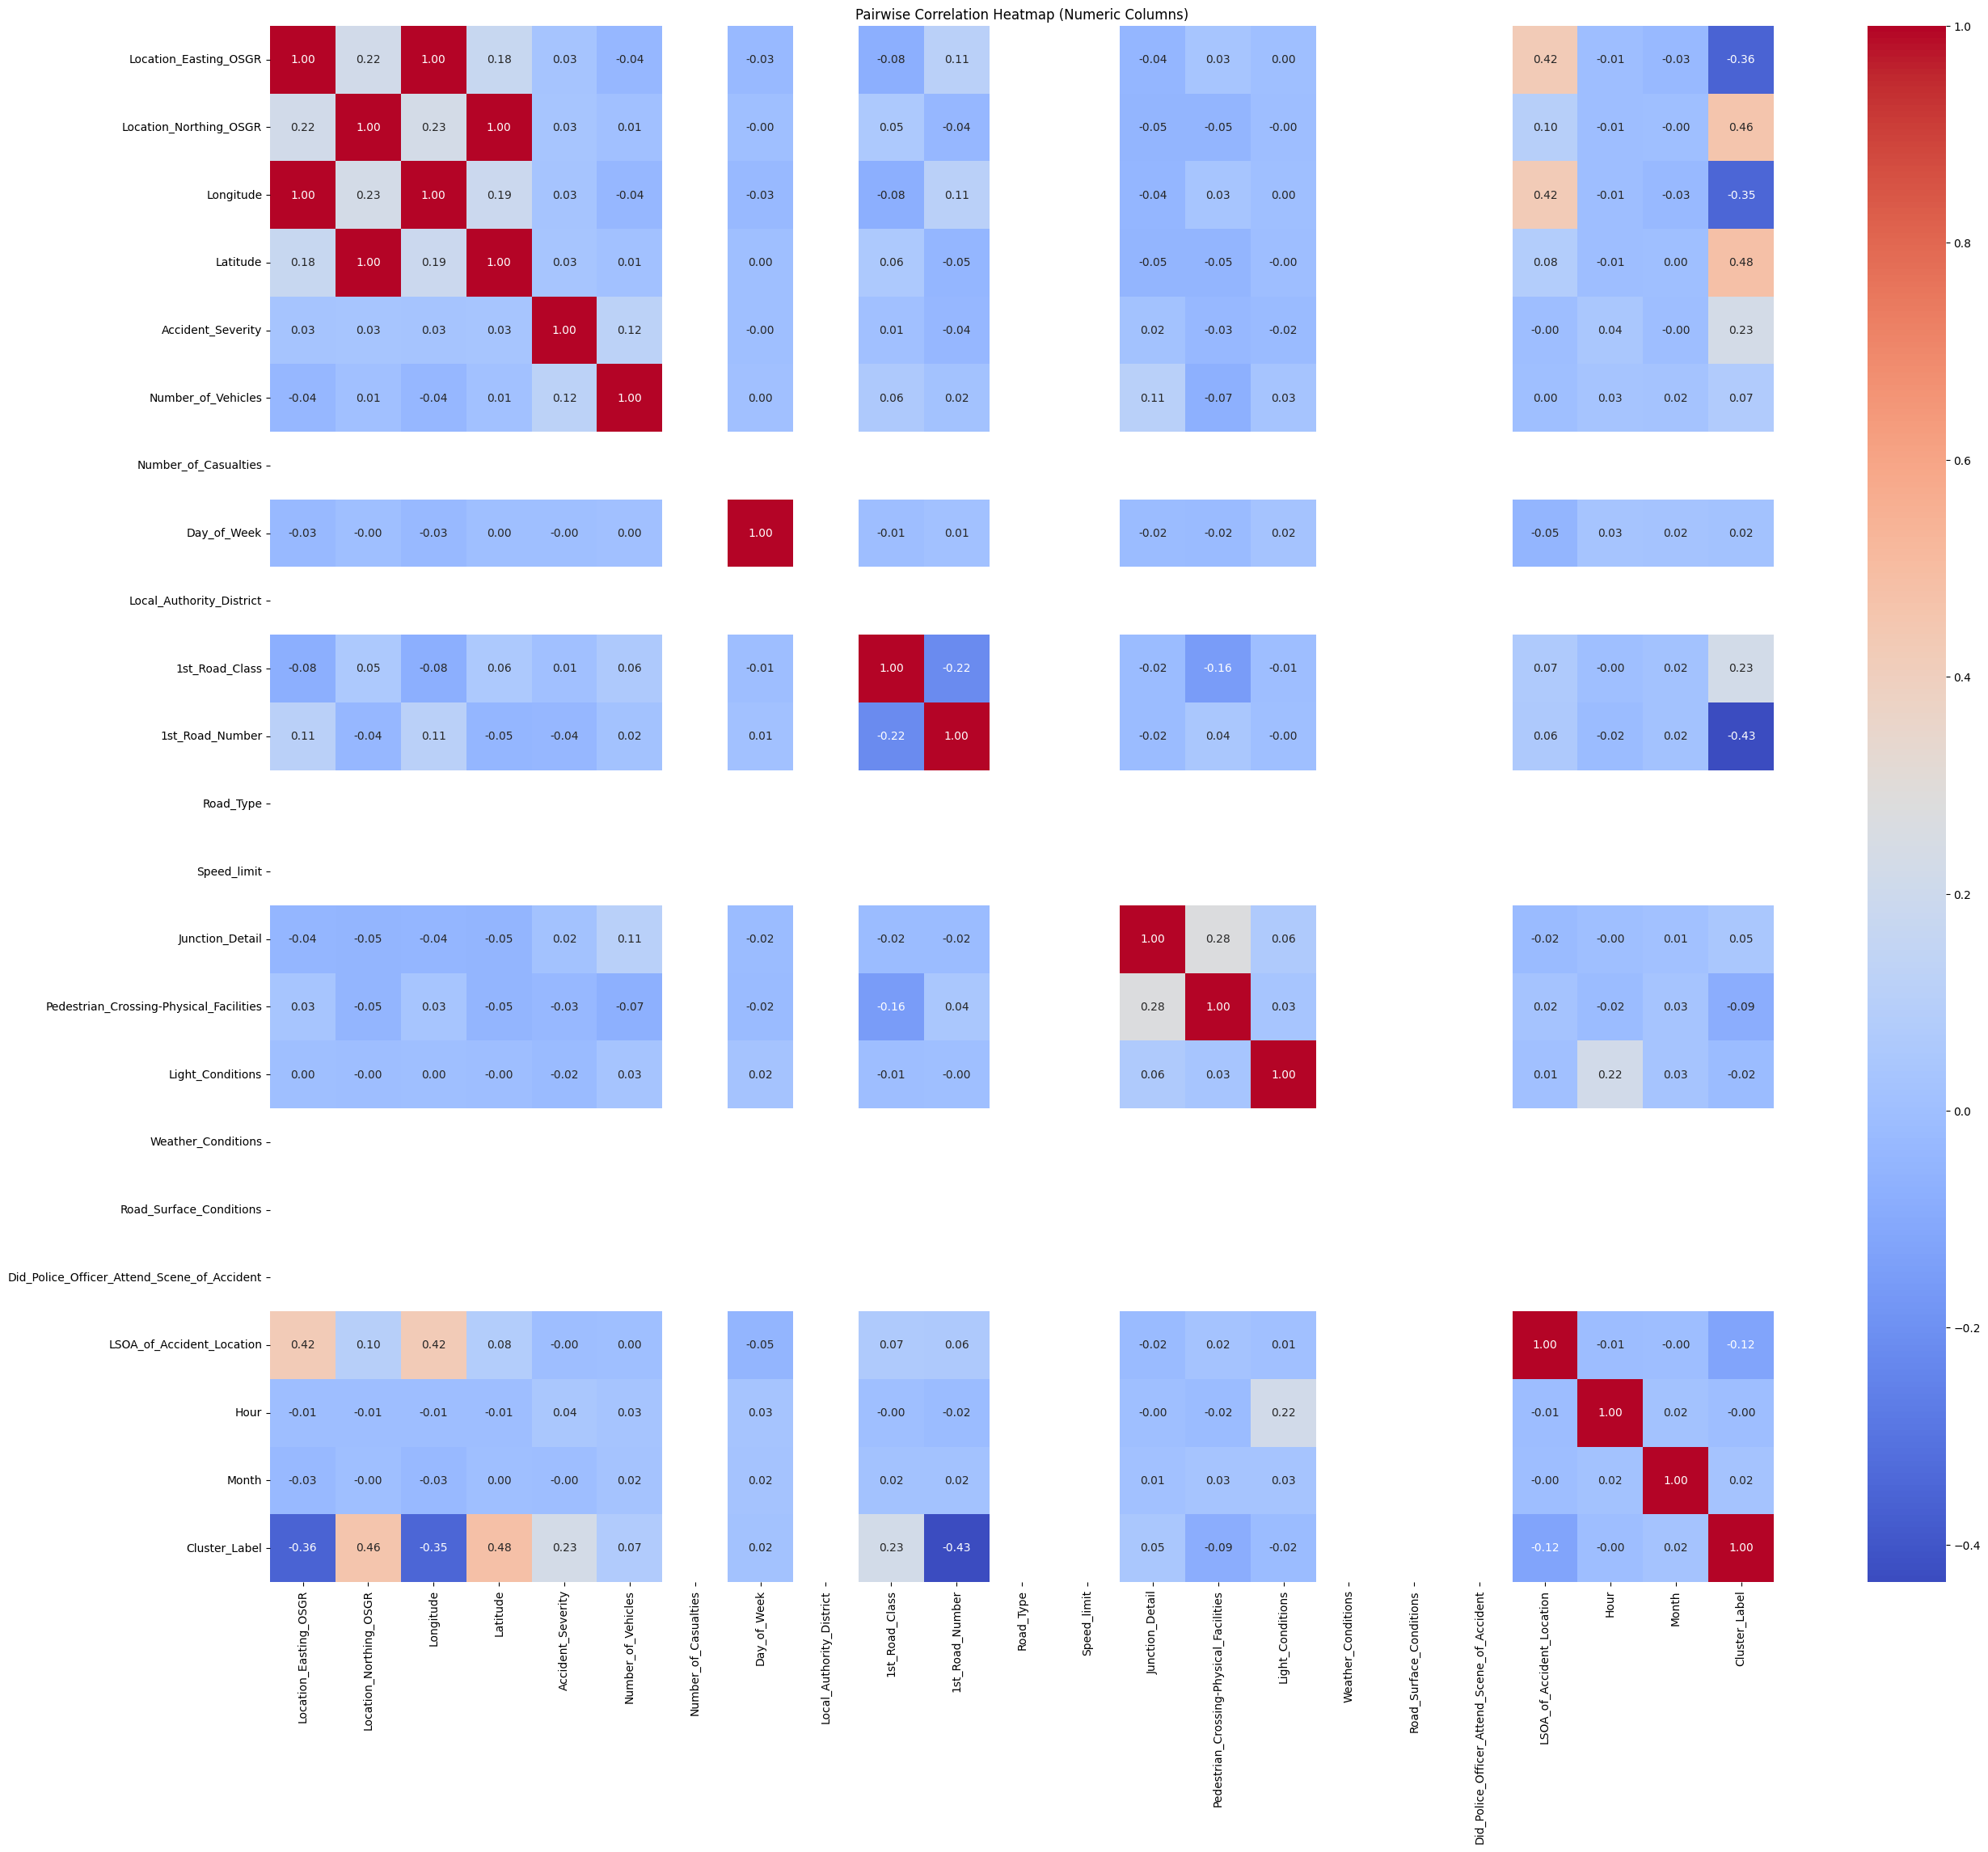

In [326]:
# Identifying numeric columns
numeric_columns = borough_data.select_dtypes(include=['number', 'float']).columns

# Computing the pairwise correlation matrix
correlation_matrix = borough_data[numeric_columns].corr()  # Default is Pearson correlation

# Displaying the correlation matrix as a heatmap
plt.figure(figsize=(30, 25))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Pairwise Correlation Heatmap (Numeric Columns)")
plt.show()

#### Analysis of the Heatmap:

1. **Purpose of the Heatmap**:
   - The heatmap shows the pairwise Pearson correlation coefficients between numeric columns in the dataset. Values closer to 1 (red) or -1 indicate strong positive or negative correlations, respectively, while values near 0 (blue) show no correlation.

2. **Observation of Strong Correlations**:
   - **`Location_Easting_OSGR` and `Location_Northing_OSGR`** have a significant positive correlation (~1), suggesting they may encode geographic proximity.
   - **`Number_of_Vehicles` and `Number_of_Casualties`** show a moderate positive correlation, which is intuitive as more vehicles in an accident can result in more casualties.

3. **Columns with No Correlation**:
   - Columns that consistently show low or near-zero correlation values across the board are likely uninformative. Examples:
     - **`Police_Force`**: Shows no variation (likely a single value).
     - **`Urban_or_Rural_Area`**: Seems constant across all rows (no variability, as reflected in zero correlation).
     - **`Special_Conditions_at_Site`**: Displays negligible correlations with all other columns.
     - **`Carriageway_Hazards`**: Similarly has no meaningful relationships with other variables.
     - **`Pedestrian_Crossing-Human_Control`**: Almost no variability or correlation.
     - **`Junction_Control`**: Has negligible correlations with the rest.
     - **`2nd_Road_Number`**: Shows no relationship to other columns.

4. **Why Drop Uncorrelated Columns**:
   - Columns with no or negligible correlation are likely uninformative for predictive models or exploratory analysis, as they don't contribute meaningful relationships. Dropping them simplifies the dataset and prevents unnecessary noise.

### Columns to Drop:
Based on the analysis, consider dropping the following:
- `Police_Force`
- `Urban_or_Rural_Area`
- `Special_Conditions_at_Site`
- `Carriageway_Hazards`
- `Pedestrian_Crossing-Human_Control`
- `Junction_Control`
- `2nd_Road_Number`


### Removing Unneseccary columns

In [143]:
borough_data = borough_data.drop(['Police_Force', 'Urban_or_Rural_Area', 'Special_Conditions_at_Site',
                                  'Carriageway_Hazards', 'Pedestrian_Crossing-Human_Control', 
                                 '2nd_Road_Number', 'Time', 'Severity_Label', 'Date'], axis=1)

In [145]:
borough_data.head().T

2782           2917  \
Location_Easting_OSGR                        530760.000000  531030.000000   
Location_Northing_OSGR                       187400.000000  187210.000000   
Longitude                                        -0.114643      -0.110821   
Latitude                                         51.570263      51.568493   
Accident_Severity                                 2.000000       3.000000   
Number_of_Vehicles                                1.000000       1.000000   
Number_of_Casualties                              1.000000       1.000000   
Day_of_Week                                       3.000000       2.000000   
Local_Authority_District                         31.000000      31.000000   
1st_Road_Class                                    3.000000       5.000000   
1st_Road_Number                                1201.000000       0.000000   
Road_Type                                         6.000000       6.000000   
Speed_limit                                      30.000000      30.000000   
Junction_Detail                                   0.000000       6.000000   
Pedestrian_Crossing-Physical_Facilities           0.000000       5.000000   
Light_Conditions                                  1.000000       1.000000   
Weather_Conditions                                1.000000       1.000000   
Road_Surface_Conditions                           1.000000       1.000000   
Did_Police_Officer_Attend_Scene_of_Accident       1.000000       1.000000   
LSOA_of_Accident_Location                       151.000000     151.000000   
Hour                                             17.000000      15.000000   
Month                                             3.000000       4.000000   

                                                      3018           3799  \
Location_Easting_OSGR                        527560.000000  531170.000000   
Location_Northing_OSGR                       187600.000000  187390.000000   
Longitude                                        -0.160718      -0.108735   
Latitude                                         51.572793      51.570078   
Accident_Severity                                 3.000000       3.000000   
Number_of_Vehicles                                2.000000       2.000000   
Number_of_Casualties                              1.000000       1.000000   
Day_of_Week                                       4.000000       5.000000   
Local_Authority_District                         31.000000      31.000000   
1st_Road_Class                                    4.000000       5.000000   
1st_Road_Number                                 519.000000       0.000000   
Road_Type                                         6.000000       6.000000   
Speed_limit                                      30.000000      30.000000   
Junction_Detail                                   0.000000       0.000000   
Pedestrian_Crossing-Physical_Facilities           0.000000       0.000000   
Light_Conditions                                  1.000000       1.000000   
Weather_Conditions                                1.000000       1.000000   
Road_Surface_Conditions                           1.000000       1.000000   
Did_Police_Officer_Attend_Scene_of_Accident       1.000000       1.000000   
LSOA_of_Accident_Location                        51.000000     108.000000   
Hour                                              9.000000       6.000000   
Month                                             5.000000      11.000000   

                                                      3805  
Location_Easting_OSGR                        527490.000000  
Location_Northing_OSGR                       187590.000000  
Longitude                                        -0.161732  
Latitude                                         51.572719  
Accident_Severity                                 3.000000  
Number_of_Vehicles                                1.000000  
Number_of_Casualties                              1.000000  
Day_of_Week           

In [147]:
borough_data.shape

(4250, 22)

### Dealing with Class Imbalancing

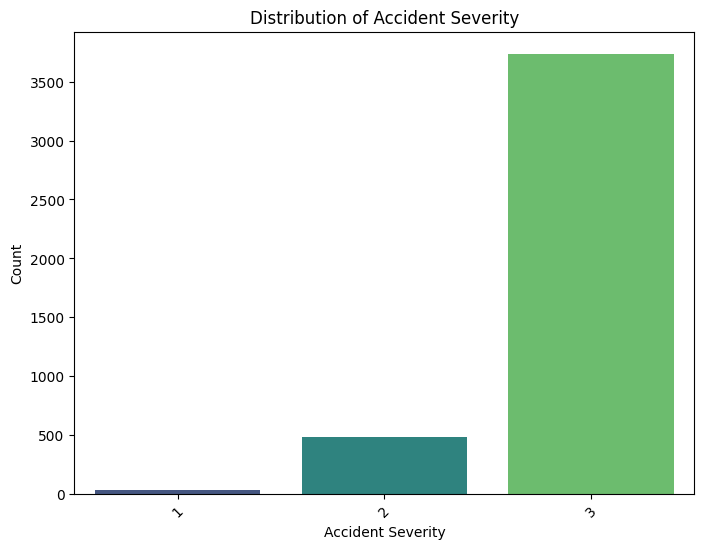

In [151]:
# Counting the occurrences of each value in 'Accident_Severity'
severity_counts = borough_data['Accident_Severity'].value_counts()

# Creating a bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=severity_counts.index, y=severity_counts.values, palette='viridis')

# Adding labels and title
plt.xlabel('Accident Severity')
plt.ylabel('Count')
plt.title('Distribution of Accident Severity')
plt.xticks(rotation=45)  # Rotating x-axis labels for better readability

# Showing the plot
plt.show()

In [155]:
# seperating features and target column
features = borough_data.drop(['Accident_Severity'], axis = 1)
target = borough_data['Accident_Severity']

In [157]:
# dealing with oversampling as our target class is imbalanced
smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(features, target) 

In [159]:
y_resampled.value_counts()

Accident_Severity
2    3740
3    3740
1    3740
Name: count, dtype: int64

We have successfully dealt with Class imbalancing in our Target column

### Splitting Data into Traing and Testing

In [163]:
#splitting data into training and testing
x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.2, random_state= 42)

### Transforing Data

In [165]:
scaler = StandardScaler()

x_scale_train = scaler.fit_transform(x_train)
x_scale_test = scaler.transform(x_test)

# Data Modelling

### Applying Random Forest model

In [169]:
rf_model = RandomForestClassifier()
rf_model.fit(x_scale_train, y_train)
y_pred = rf_model.predict(x_scale_test)

#### Model Evaluation Function

In [172]:
# function for evaluation metrics precision, recall, f1 etc
def modelEvaluation(predictions, y_test_set, model_name):
    # Print model evaluation to predicted result
    print("==========",model_name,"==========")
    print ("\nAccuracy on validation set: {:.4f}".format(accuracy_score(y_test_set, predictions)))
    print ("\nClassification report : \n", classification_report(y_test_set, predictions))
    print ("\nConfusion Matrix : \n")
    plt.figure(figsize=(5,4))
    sns.heatmap(confusion_matrix(y_test_set, predictions), annot=True, fmt='g',cmap='viridis') #xticklabels =  [class_1, class_2], yticklabels =  [class_1, class_2, class_3, class_4])
    plt.tight_layout()
    plt.xlabel('predicted')
    plt.ylabel('Actual')
    plt.show()
    results = [accuracy_score(y_test_set, predictions), precision_score(y_test_set, predictions, average='macro'),
              recall_score(y_test_set, predictions, average='macro')]#,f1_score(y_test_set, predictions, average='macro')]
    return results

========== Random Forest ==========

Accuracy on validation set: 0.9519

Classification report : 
               precision    recall  f1-score   support

           1       1.00      0.99      1.00       761
           2       0.95      0.90      0.93       712
           3       0.91      0.96      0.93       771

    accuracy                           0.95      2244
   macro avg       0.95      0.95      0.95      2244
weighted avg       0.95      0.95      0.95      2244


Confusion Matrix : 



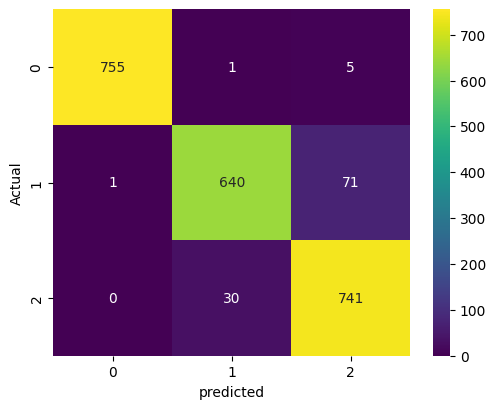

In [174]:
# for getting the results
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report, f1_score


results_random_forest = modelEvaluation(y_pred, y_test, 'Random Forest')

## Applying K-means Clustering Model

### Scaling Data

Applying Scaling on Complete Data to apply K-means properly

In [282]:
from sklearn.preprocessing import MinMaxScaler

#scaler = MinMaxScaler()

scaler = StandardScaler()
df_scaled = scaler.fit_transform(borough_data)

### Using Elbow method to get optimal Clusters

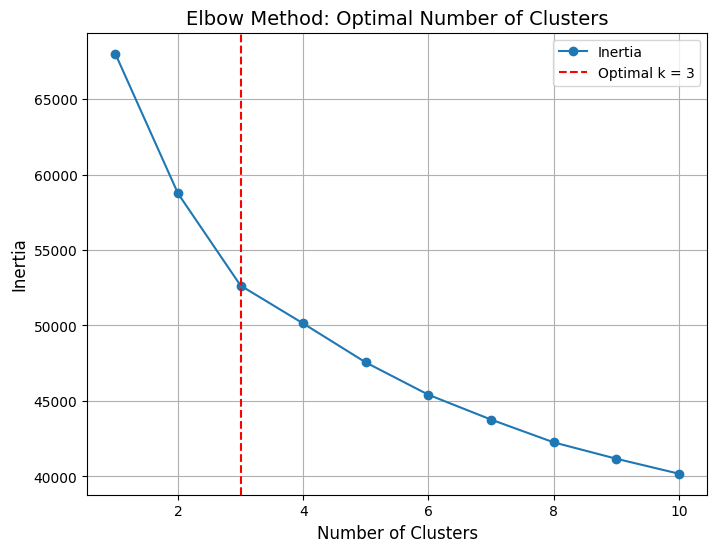

In [319]:
inertia = []
K_range = range(1, 11)  # Trying between 1 and 10 clusters

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Identifying the "elbow point" (for illustration, using k=3 as the elbow)
optimal_k = 3  # Change this based on the visible "elbow" or programmatic detection

# Plotting the Elbow curve
plt.figure(figsize=(8, 6))
plt.plot(K_range, inertia, marker='o', label='Inertia')
plt.axvline(x=optimal_k, color='r', linestyle='--', label=f'Optimal k = {optimal_k}')
plt.title('Elbow Method: Optimal Number of Clusters', fontsize=14)
plt.xlabel('Number of Clusters', fontsize=12)
plt.ylabel('Inertia', fontsize=12)
plt.grid(True)
plt.legend()
plt.show()

#### Explanation:

- Initially, inertia decreases sharply as the number of clusters increases, indicating better clustering as more centroids are added.
- After a certain point, the rate of decrease slows down, forming an "elbow" shape. This is the point where adding more clusters provides diminishing returns.

#### Optimal Number of Clusters:

- The **elbow point** is the location where the curve transitions from steep to shallow. In this graph, the elbow appears around **3 clusters**, suggesting that 3 is the optimal number of clusters for this dataset.


### Applying K-Mean

In [302]:
# Based on the elbow method, the chosen the number of clusters 
optimal_k = 3

In [304]:
# Applying KMeans with the chosen number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
borough_data['Cluster_Label'] = kmeans.fit_predict(df_scaled)

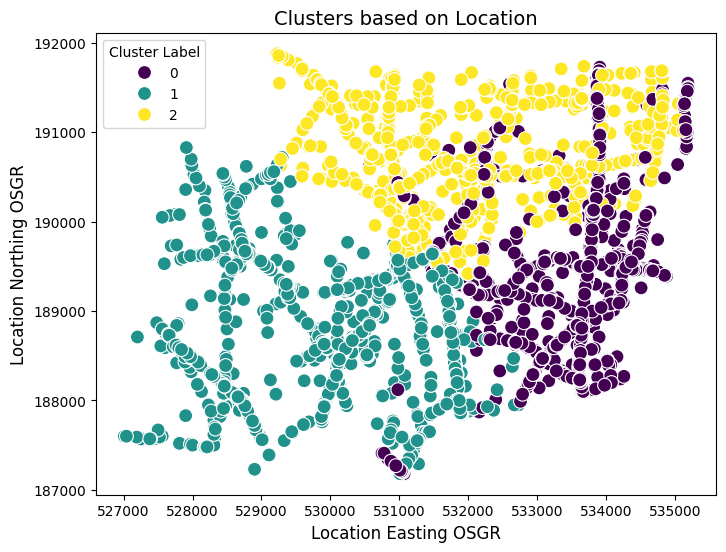

In [306]:
# Step 6: Visualizing the Clusters 
# Let's use the first two features for visualization, just as an example.
plt.figure(figsize=(8, 6))
sns.scatterplot(x=borough_data['Location_Easting_OSGR'], y=borough_data['Location_Northing_OSGR'], hue=borough_data['Cluster_Label'], palette='viridis', s=100)
plt.title('Clusters based on Location', fontsize=14)
plt.xlabel('Location Easting OSGR', fontsize=12)
plt.ylabel('Location Northing OSGR', fontsize=12)
plt.legend(title='Cluster Label')
plt.show()

### Evaluating Model

In [309]:
# Inertia
inertia = kmeans.inertia_
print(f'Inertia: {inertia}')

Inertia: 52643.22825154262


In [311]:
# Silhouette Score
sil_score = silhouette_score(df_scaled, borough_data['Cluster_Label'])
print(f'Silhouette Score: {sil_score}')

Silhouette Score: 0.1356004153984579


In [313]:
# Davies-Bouldin Index
db_index = davies_bouldin_score(df_scaled, borough_data['Cluster_Label'])
print(f'Davies-Bouldin Index: {db_index}')

Davies-Bouldin Index: 2.2065661950607285
